# Forecasting Seasonal Flu Vaccine Adoption
![image](Images/influenza-vaccine.png)

# Project Overview
This project aims to develop machine learning models to predict whether individuals received the **H1N1** and/or **seasonal flu vaccines** using a dataset collected during the 2009 H1N1 pandemic. Understanding vaccination behavior is essential for effective public health planning and targeted outreach during pandemics or annual flu seasons.

By leveraging demographic, behavioral, and perceptual features, this analysis seeks to identify patterns associated with vaccine uptake and enable data-driven public health interventions.



# Understanding the Business Context

Vaccination remains one of the most effective public health interventions for controlling the spread of infectious diseases. While vaccines offer individual protection and contribute to herd immunity, not everyone chooses to get vaccinated. This project explores what influences people's decisions to receive the seasonal flu vaccine—a critical tool for preventing widespread flu outbreaks.


### Stakeholders

The intended audience for this analysis includes:
- **Public health officials and policy-makers**: To identify vaccine-hesitant populations and direct educational campaigns.
- **Healthcare providers**: To understand patient profiles that may benefit from additional engagement.
- **Data scientists and epidemiologists**: For building robust, predictive tools in health-related behavioral modeling.

By identifying the factors that affect vaccine uptake, this stakeholders such as public health officials, government agencies, and pharmaceutical companies can make informed decisions to boost vaccination rates, particularly in vulnerable or hesitant populations.

Understanding which factors influence vaccine acceptance can also help optimize limited resources during health crises and improve vaccine outreach programs.


### Problem Statement
Public health initiatives emphasize both prevention and treatment, with vaccination serving as a central preventative measure. However, vaccine hesitancy—the delay in acceptance or refusal of vaccines despite availability—is a growing concern worldwide.

This study aims to investigate how various individual-level attributes—including socioeconomic status, behavioral traits, demographic background, and perceptions about vaccines—influence the decision to receive a flu vaccine. Understanding these relationships is vital for designing outreach strategies and ensuring that vaccines reach those who need them most.


### General Objective

To identify the determinants that influence the adoption of the seasonal flu vaccine.


### Specific Objectives
**1. Socioeconomic Factors** :Analyze how income level, education, employment status, and access to healthcare influence flu vaccination uptake.

**2. Behavioral Factors** :Examine whether lifestyle habits (e.g., doctor visits, preventive health behavior) impact the likelihood of getting vaccinated.

**3. Demographics** :Investigate the role of age, gender, race, and family structure in vaccine adoption.

**4. Perceptions and Attitudes** :Assess how personal beliefs about vaccine safety, effectiveness, and the perceived threat of illness shape decisions around vaccination.


### Key Research Questions
1. How do financial and social circumstances (e.g., income, insurance coverage) affect a person's decision to get the flu vaccine?

2. What behaviors (e.g., regular check-ups, risk avoidance) are linked to higher vaccine uptake?

3. Do demographic factors (e.g., age, gender, education level) have predictive value in vaccination trends?

4. How does trust in vaccines and perceived vulnerability to illness influence vaccination behavior?



# Data Understanding
Before conducting any analysis, it is crucial to understand the structure and contents of the dataset. This includes examining the data types, identifying missing values, and understanding key features.The dataset contains roughly 26,000 records, including individual information and their vaccination choices.


### Data Source
The dataset was sourced from [DRIVENDATA](https://www.kaggle.com/datasets/soundslikedata/flu-shot-learning) and originates from the CDC, NCRID, and NCHS as part of the 2009 H1N1 Flu Survey. Data was collected via phone interviews from late 2009 to mid-2010.

Label  details are available [here](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#labels) and also features details are available [here](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#features_list).


### Analytical Framework(Data Science Cycle)
This project utilizes the CRISP-DM (CRoss Industry Standard Process for Data Mining) methodology, a widely adopted framework for structuring data science projects.
The project follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, which includes:

* Business and Data Understanding

* Data Preparation

* Exploratory Data Analysis (EDA)

* Model Development and Evaluation

* Interpretation of Results and Recommendations

Machine learning models such as Logistic Regression, Random Forest, and Gradient Boosting will be tested to identify the most effective predictors of vaccine uptake.


For more info:[click here](https://www.datascience-pm.com/crisp-dm-2/)

### Dataset Size and Descriptive Statistics

The dataset consists of several thousand rows, each representing a unique respondent. There are 36 columns in the dataset, including the respondent ID, two target variables (h1n1_vaccine and seasonal_vaccine), and 34 features.

Let's load the dataset and explore its size and some basic descriptive statistics for all features.

# Data Preparation and Cleaning

### Importing Essential Libraries 


In [330]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

import missingno as msno


### Start by loading and understanding the datasets

#### training_set_features.csv

In [331]:
#import the train dataset
train = pd.read_csv(r"Data\training_set_features.csv")
train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [332]:
#Examine Data Shape and Size
print("Train Shape:", train.shape)

Train Shape: (26707, 36)


 **The train feature** dataset contains 26707 rows and 36 columns.

In [333]:
# Print column names and data types of the "train" DataFrame
print("\nTrain Data Columns:")
print(train.columns)



Train Data Columns:
Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


##### Drop information for HINI since our target feature is seasonal flue vaccines

* The columns are not relevant for our current analysis

In [334]:
# Drop columns related to H1N1 flu from the "train" DataFrame
train.drop(columns=["h1n1_concern","h1n1_knowledge","doctor_recc_h1n1","opinion_h1n1_vacc_effective","opinion_h1n1_risk","opinion_h1n1_sick_from_vacc"], axis=1, inplace=True)

In [335]:
# Check if the columns dropped
print("train Shape:", train.shape)

train Shape: (26707, 30)


* Six columns were successfully dropped.

In [336]:
# Explore Data Structure

# train df
print("train Info:")
print(train.info())

train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_seasonal         24547 non-null  float64
 9   chronic_med_condition        25736 non-null  float64
 10  child_under_6_months         25887 non-null  float64
 11  health_worker                25903 non-null  float64
 12  health_insurance             14433 non-null  float64
 13  opin

* The training dataset contain float and object datatypes
* The dataset shall remain as it is since it matches the test dataset types

In [337]:
# Explore train Summary Statistics
print("train Summary Statistics:")
print(train.describe())


train Summary Statistics:
       respondent_id  behavioral_antiviral_meds  behavioral_avoidance  \
count   26707.000000               26636.000000          26499.000000   
mean    13353.000000                   0.048844              0.725612   
std      7709.791156                   0.215545              0.446214   
min         0.000000                   0.000000              0.000000   
25%      6676.500000                   0.000000              0.000000   
50%     13353.000000                   0.000000              1.000000   
75%     20029.500000                   0.000000              1.000000   
max     26706.000000                   1.000000              1.000000   

       behavioral_face_mask  behavioral_wash_hands  \
count          26688.000000           26665.000000   
mean               0.068982               0.825614   
std                0.253429               0.379448   
min                0.000000               0.000000   
25%                0.000000               1.00

* From the summary statistics, data does not have outliers since the data contains the binary and categorical types of data.
* More on outliers will be checked during the EDA process.

#### Checking for duplicates

In [338]:
# Check duplicates
duplicates_train = train.duplicated()
num_duplicates_train = duplicates_train.sum()
print("Duplicate Rows in Train Set:", num_duplicates_train)

Duplicate Rows in Train Set: 0


* There are no duplicates in train dataset

#### Checking for Missing Values

In [339]:
# check for the percentage of missing values
missing_train1=(train.isnull().sum()/len(train))*100

# show columns with the highest missing percentages
missing_train1 = missing_train1.sort_values(ascending=False)

print("Missing values:")
print(missing_train1)

Missing values:
employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_antiviral_meds       0.265848
behavioral_wash_hands           0.157262
behavioral_face_mask            0.071142


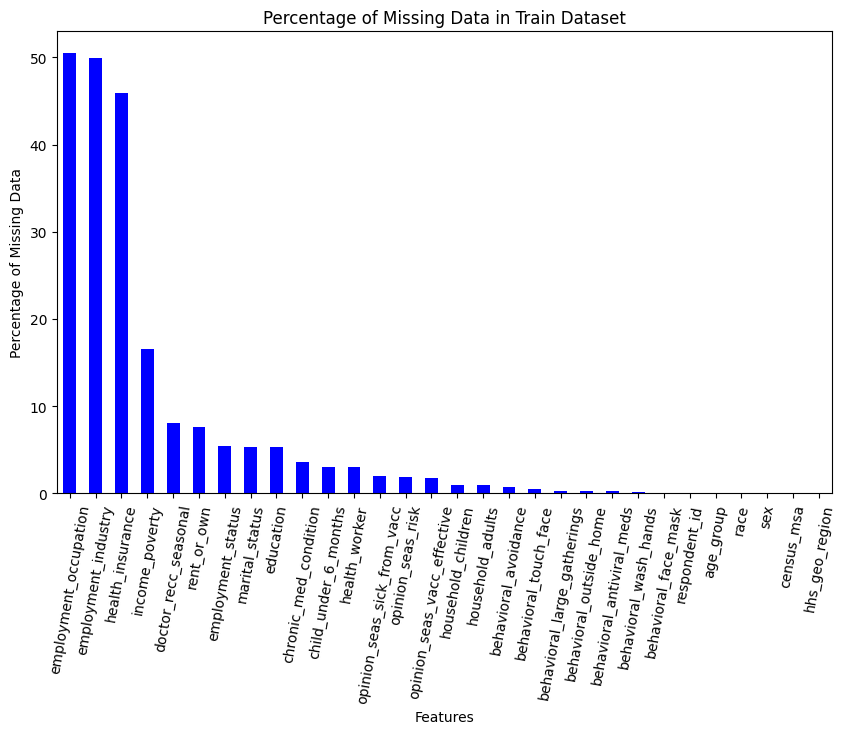

In [411]:
# Visualize missing values
# Visualize missing values
plt.figure(figsize=(10, 6))
missing_train1.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Percentage of Missing Data in Train Dataset')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Data')
plt.xticks(rotation=80)

plt.savefig("images/missing_data_in_Train_dataset.png")
plt.show()


**Observations on Missing Data**
1. The columns employment_occupation, employment_industry, and health_insurance have the highest proportions of missing values, accounting for approximately 50.4%, 49.9%, and 46.0% of their respective entries.

2. However, a large portion of these missing values is not due to non-responsiveness but rather due to non-applicability. Specifically, 10,231 of the missing values in employment_occupation and employment_industry correspond to individuals who selected “Not in Labor Force” under employment_status. In these cases, the missing values are better interpreted as irrelevant rather than as omissions.

3. Additionally, 1,453 more missing entries represent individuals who are unemployed. Again, for these people, it makes more sense to treat these fields as "not applicable" rather than as unanswered questions.

**Patterns in Missing Responses**

There are notable patterns among other missing fields:

1. If a respondent chose not to answer whether a doctor recommended one type of vaccine, they often skipped the same question for the other vaccine type.

2. Many respondents also did not answer questions related to chronic medical conditions, having a child under 6 months, health worker status, personal beliefs, income, education, and household characteristics.

3. These trends suggest that certain groups of respondents consistently opted out of multiple related questions, potentially representing a distinct category of participants.

**Implications for Analysis**

Such structured patterns in missing data suggest that the absence of a response may carry meaningful information. Rather than discarding or simply imputing these values, treating them as a separate category could reveal insights into respondent behavior and improve model performance. Consequently, careful preprocessing and thoughtful treatment of missing values are essential in the data analysis process.

1. Employment Columns

* For individuals marked as "Unemployed" in the employment_status column, the employment_industry is updated to "not employed".
* For individuals marked as "Not in Labor Force" in the employment_status column, the employment_industry is also updated to "not employed".
* For individuals marked as "Unemployed" in the employment_status column, the employment_occupation is updated to "not employed".
* For individuals marked as "Not in Labor Force" in the employment_status column, the employment_occupation is also updated to "not employed".

By labeling these cases as not employed, the missing values are now replaced with meaningful information, which can be utilized for further analysis without introducing any biased assumptions.



In [341]:
## if a person is unemployed, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Unemployed", "employment_industry"] = "not employed"

## if a person is not in the labor force, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Not in Labor Force", "employment_industry"] = "not employed"


In [342]:
## if a person is unemployed, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Unemployed", "employment_occupation"] = "not employed"

## if a person is not in the labor force, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Not in Labor Force", "employment_occupation"] = "not employed"

**2. health_insuarance Column**

* Missing values in the "health_insurance" column are filled with 0, assuming that those with missing values likely do not have health insurance coverage, possibly due to financial constraints associated with a higher poverty index.



In [343]:
#Filling the missing values in health insurance with 0 assumptions is that there is correlation between the poverty index and health cover

train.fillna({"health_insurance": 0}, inplace=True)


In [344]:
# check again for the missing values
missing_train2=(train.isnull().sum()/len(train))*100

missing_train2 = missing_train2.sort_values(ascending=False)

print("Missing values:")
print(missing_train2)

Missing values:
income_poverty                 16.561201
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_occupation           6.687385
employment_industry             6.163178
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_antiviral_meds       0.265848
behavioral_wash_hands           0.157262
behavioral_face_mask            0.071142
respondent_id                   0.000000


* In reference to  the first we see a significant reduction of missing values in the training dataset

### 3 Calculating the frequency percentage of each unique value

* To help identify columns with a large number of unique values that might require special treatment during data preprocessing or feature engineering.

In [345]:
total_observations = len(train)

for col in train.columns:
    print(f"Column: {col}")
    freq_percentage = train[col].value_counts(dropna=False) / total_observations * 100
    print(freq_percentage)
    print()


Column: respondent_id
respondent_id
26706    0.003744
0        0.003744
1        0.003744
26690    0.003744
26689    0.003744
           ...   
7        0.003744
6        0.003744
5        0.003744
4        0.003744
3        0.003744
Name: count, Length: 26707, dtype: float64

Column: behavioral_antiviral_meds
behavioral_antiviral_meds
0.0    94.862770
1.0     4.871382
NaN     0.265848
Name: count, dtype: float64

Column: behavioral_avoidance
behavioral_avoidance
1.0    71.996106
0.0    27.225072
NaN     0.778822
Name: count, dtype: float64

Column: behavioral_face_mask
behavioral_face_mask
0.0    93.035534
1.0     6.893324
NaN     0.071142
Name: count, dtype: float64

Column: behavioral_wash_hands
behavioral_wash_hands
1.0    82.431572
0.0    17.411166
NaN     0.157262
Name: count, dtype: float64

Column: behavioral_large_gatherings
behavioral_large_gatherings
0.0    63.927060
1.0    35.747182
NaN     0.325757
Name: count, dtype: float64

Column: behavioral_outside_home
behavioral_out

* Since the remaining missing values are categorical variables, we will fill using Unknown for the education, marital_status, rent_or_own, and income_poverty columns.
* This gives a clear label for the missing values and allows the values to be treated as a distinct category during data analysis and modeling.

In [346]:
train["education"] = train["education"].fillna("Unknown")
train["marital_status"] = train["marital_status"].fillna("Unknown")
train["rent_or_own"] = train["rent_or_own"].fillna("Unknown")
train["income_poverty"] = train["income_poverty"].fillna("Unknown")

Filling in the missing values using the most frequent (mode) value, as the number of missing entries is relatively small.

In [347]:
# fill all the categorical variable with the modal class
train_filled = train.fillna(train.mode().iloc[0])
missing2=train_filled.isnull().sum() # confirm if the data has been filled.

missing2

respondent_id                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
employment_occupation          0
dtype: int

### 2. test_set_features.csv

In [348]:
# import the test dataset
test = pd.read_csv(r"Data\test_set_features.csv")
test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [349]:
 #Examine Data Shape and Size
print("Test Shape:", test.shape)

Test Shape: (26708, 36)


**The test dataset** contains 26708 rows and 36 columns

### **Drop information for HINI since our target feature is seasonal flu vaccines in our test dataset**
* The columns are not directly relevant to the current analysis.


In [350]:
# Drop columns related to H1N1 flu from the "test" DataFrame
test.drop(columns=["h1n1_concern","h1n1_knowledge","doctor_recc_h1n1","opinion_h1n1_vacc_effective","opinion_h1n1_risk","opinion_h1n1_sick_from_vacc"], axis=1, inplace=True)

print("test Shape:", test.shape)

test Shape: (26708, 30)


* Six columns were successfully dropped.

In [351]:
# Print column names and data types of the "test" DataFrame
print("\nTest Data Columns:")
print(test.columns)



Test Data Columns:
Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation'],
      dtype='object')


In [352]:
# Explore Data Structure info
#test df
print("\ntest Info:")
print(test.info())


test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   behavioral_antiviral_meds    26629 non-null  float64
 2   behavioral_avoidance         26495 non-null  float64
 3   behavioral_face_mask         26689 non-null  float64
 4   behavioral_wash_hands        26668 non-null  float64
 5   behavioral_large_gatherings  26636 non-null  float64
 6   behavioral_outside_home      26626 non-null  float64
 7   behavioral_touch_face        26580 non-null  float64
 8   doctor_recc_seasonal         24548 non-null  float64
 9   chronic_med_condition        25776 non-null  float64
 10  child_under_6_months         25895 non-null  float64
 11  health_worker                25919 non-null  float64
 12  health_insurance             14480 non-null  float64
 13  opin

**Observations**

* Several features have missing values, which could affect model predictions:

* health_insurance: ~45.8% missing (12,228 nulls)

* employment_industry and employment_occupation: ~50% missing

* doctor_recc_seasonal: ~2,160 missing

* Other behavioral/opinion features have a small percentage (~0.1–3%) missing.

**Action:** Consider imputation or excluding these features depending on their importance and the imputation strategy used in your training set.

In [353]:
# Explore train Summary Statistics
print("test Summary Statistics:")
print(test.describe())

test Summary Statistics:
       respondent_id  behavioral_antiviral_meds  behavioral_avoidance  \
count   26708.000000               26629.000000          26495.000000   
mean    40060.500000                   0.049645              0.729798   
std      7710.079831                   0.217215              0.444072   
min     26707.000000                   0.000000              0.000000   
25%     33383.750000                   0.000000              0.000000   
50%     40060.500000                   0.000000              1.000000   
75%     46737.250000                   0.000000              1.000000   
max     53414.000000                   1.000000              1.000000   

       behavioral_face_mask  behavioral_wash_hands  \
count          26689.000000           26668.000000   
mean               0.069279               0.826084   
std                0.253934               0.379045   
min                0.000000               0.000000   
25%                0.000000               1.000

* From the summary statistics, data does not have outliers since the data contains the binary and categorical types of data.This is similar to train dataset


**Checking for duplicates**


In [354]:
# Check duplicates
duplicates_test = test.duplicated()
num_duplicates_test = duplicates_test.sum()
print("Duplicate Rows in Test Set:", num_duplicates_test)

Duplicate Rows in Test Set: 0


* There are no duplicates in the dataset

In [355]:
# check for the percentage of missing values
missing_test1=(test.isnull().sum()/len(test))*100

# show columns with the highest missing percentages
missing_test1 = missing_test1.sort_values(ascending=False)

print("Missing values:")
print(missing_test1)


Missing values:
employment_occupation          50.269582
employment_industry            49.704208
health_insurance               45.784035
income_poverty                 16.837652
doctor_recc_seasonal            8.087464
rent_or_own                     7.623184
employment_status               5.507713
marital_status                  5.399131
education                       5.268084
chronic_med_condition           3.489591
child_under_6_months            3.044032
health_worker                   2.954171
opinion_seas_sick_from_vacc     1.950726
opinion_seas_risk               1.868354
opinion_seas_vacc_effective     1.692377
household_children              0.842444
household_adults                0.842444
behavioral_avoidance            0.797514
behavioral_touch_face           0.479257
behavioral_outside_home         0.307024
behavioral_antiviral_meds       0.295792
behavioral_large_gatherings     0.269582
behavioral_wash_hands           0.149768
behavioral_face_mask            0.071140


  **High Missingness (Over 40%)**
* employment_occupation (50.3%) and employment_industry (49.7%): Too sparse — consider dropping or encoding as "Missing".

* health_insurance (45.8%): Important but highly incomplete — impute with a placeholder like "Unknown" if retaining.

 **Moderate Missingness (5%–20%)**

* Features like income_poverty, doctor_recc_seasonal, rent_or_own, employment_status, marital_status, education have moderate gaps — impute based on domain knowledge, mode, or introduce "Unknown" category.

**Low Missingness (<5%)**
Most behavioral and opinion features have minimal missing values — suitable for simple imputation (mode/median).

No missing values in age_group, sex, race, census_msa, hhs_geo_region — these are reliable.



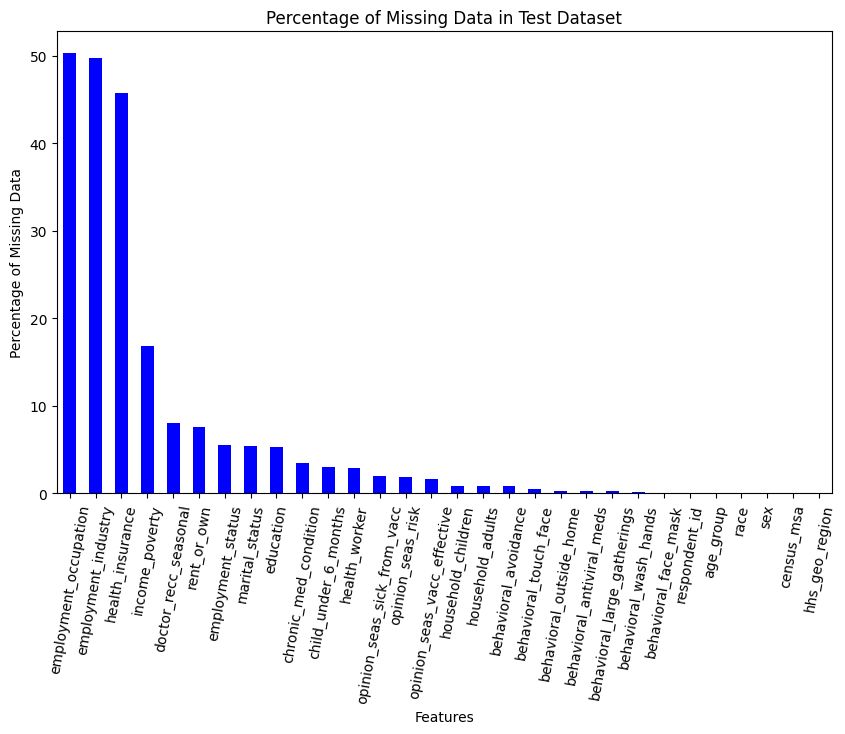

In [356]:
# Visualize missing values
plt.figure(figsize=(10, 6))
missing_test1.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Percentage of Missing Data in Test Dataset')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Data')
plt.xticks(rotation=80)
plt.show()


**Observations**

1. The employment_occupation, employment_industry, and health_insurance columns have the most missing values, with null values making up 50.4%, 49.9%, and 46.0% of the columns, respectively.

2. However, 10,231 of the null values for employment_occupation and employment_industry are basically "not applicable" rather than someone declining to answer because those are the respondents who answered "Not in Labor Force" for employment_status (see below).

3. See the same for an additional 1,453 observations representing all unemployed individuals. Again employment_occupation and employment_industry are better thought of as "not applicable" rather than someone declining to answer.

**There are some clear patterns in missing values:**

1. If respondent declined to answer whether their doctor recommended one type of vaccine, they usually declined to answer about whether their doctor recommended the other type.

2. Individuals also seemed to decline to answer whether they had a chronic medical condition, a child under 6 months, whether they were a health worker, all opinion questions, income, education, personal and home life questions.

3. These missing data patterns may indicate unique respondent categories. Treating missing values as a separate category can offer insights into non-provided features. Handling this significant portion of the dataset requires thoughtful data preprocessing and analysis.

1. Employment Columns

* For individuals marked as "Unemployed" in the employment_status column, the employment_industry is updated to "not employed".
* For individuals marked as "Not in Labor Force" in the employment_status column, the employment_industry is also updated to "not employed".
* For individuals marked as "Unemployed" in the employment_status column, the employment_occupation is updated to "not employed".
* For individuals marked as "Not in Labor Force" in the employment_status column, the employment_occupation is also updated to "not employed".
By labeling these cases as not employed, the missing values are now replaced with meaningful information, which can be utilized for further analysis without introducing any biased assumptions.

In [357]:
## if a person is unemployed, change their "employment_industry" to "not_employed"
test.loc[test["employment_status"] == "Unemployed", "employment_industry"] = "not employed"

## if a person is not in the labor force, change their "employment_industry" to "not_employed"
test.loc[test["employment_status"] == "Not in Labor Force", "employment_industry"] = "not employed"

In [358]:
## if a person is unemployed, change their "employment_industry" to "not_employed"
test.loc[test["employment_status"] == "Unemployed", "employment_occupation"] = "not employed"

## if a person is not in the labor force, change their "employment_industry" to "not_employed"
test.loc[test["employment_status"] == "Not in Labor Force", "employment_occupation"] = "not employed"

2. health_insurance Column

Missing values in the "health_insurance" column are filled with 0, assuming that those with missing values likely do not have health insurance coverage, possibly due to financial constraints associated with a higher poverty index.

In [359]:
#Filling the missing values in health insurance with 0 assumptions is that there is correlation between the poverty index and health cover
test["health_insurance"] = test["health_insurance"].fillna(0)

In [360]:
# check again for the missing values
missing=(test.isnull().sum()/len(test))*100

missing = missing.sort_values(ascending=False)

print("Missing values:")
print(missing)

Missing values:
income_poverty                 16.837652
doctor_recc_seasonal            8.087464
rent_or_own                     7.623184
employment_occupation           6.818182
employment_industry             6.252808
employment_status               5.507713
marital_status                  5.399131
education                       5.268084
chronic_med_condition           3.489591
child_under_6_months            3.044032
health_worker                   2.954171
opinion_seas_sick_from_vacc     1.950726
opinion_seas_risk               1.868354
opinion_seas_vacc_effective     1.692377
household_adults                0.842444
household_children              0.842444
behavioral_avoidance            0.797514
behavioral_touch_face           0.479257
behavioral_outside_home         0.307024
behavioral_antiviral_meds       0.295792
behavioral_large_gatherings     0.269582
behavioral_wash_hands           0.149768
behavioral_face_mask            0.071140
respondent_id                   0.000000


* Similar to the training dataset we  see a significant reduction of missing values in the test dataset 

**Calculating the frequency percentage of each unique value**

To help identify columns with a large number of unique values that might require special treatment during data preprocessing or feature engineering.

In [361]:
total_observations = len(test)

for col in train.columns:
    print(f"Column: {col}")
    freq_percentage = test[col].value_counts(dropna=False) / total_observations * 100
    print(freq_percentage)
    print()

Column: respondent_id
respondent_id
53414    0.003744
26707    0.003744
26708    0.003744
26709    0.003744
53398    0.003744
           ...   
26715    0.003744
26714    0.003744
26713    0.003744
26712    0.003744
26711    0.003744
Name: count, Length: 26708, dtype: float64

Column: behavioral_antiviral_meds
behavioral_antiviral_meds
0.0    94.754381
1.0     4.949828
NaN     0.295792
Name: count, dtype: float64

Column: behavioral_avoidance
behavioral_avoidance
1.0    72.397783
0.0    26.804703
NaN     0.797514
Name: count, dtype: float64

Column: behavioral_face_mask
behavioral_face_mask
0.0    93.005841
1.0     6.923019
NaN     0.071140
Name: count, dtype: float64

Column: behavioral_wash_hands
behavioral_wash_hands
1.0    82.484649
0.0    17.365583
NaN     0.149768
Name: count, dtype: float64

Column: behavioral_large_gatherings
behavioral_large_gatherings
0.0    64.673506
1.0    35.056912
NaN     0.269582
Name: count, dtype: float64

Column: behavioral_outside_home
behavioral_out

* Since the remaining missing values are categorical variables, we will fill using Unknown for the education, marital_status, rent_or_own, and income_poverty columns.
* This gives a clear label for the missing values and allows the values to be treated as a distinct category during data analysis and modeling.

In [362]:
# filling with unkwown for categorical isna values

train["education"] = test["education"].fillna("Unknown")
train["marital_status"] = test["marital_status"].fillna("Unknown")
train["rent_or_own"] = test["rent_or_own"].fillna("Unknown")
train["income_poverty"] = test["income_poverty"].fillna("Unknown")

**Filling with modal class for the missing values since the counts is insignificant**

In [363]:
# fill all the categorical variable with the modal class
train_filled = train.fillna(train.mode().iloc[0])
missing2=train_filled.isnull().sum() # confirm if the data has been filled.

missing2

respondent_id                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
employment_occupation          0
dtype: int

* Here our dataset is now clean and ready for analysis as there are no missing values

### 3. training_set_labels.csv

In [364]:
# import the target dataset
target = pd.read_csv(r"Data\training_set_labels.csv")
target.head()


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [365]:
#Examine Data Shape and Size
print("Target Shape:", target.shape)



Target Shape: (26707, 3)


**The target dataset** contains 26707 rows and 3 columns

In [366]:
# Print column names and data types of the "target" DataFrame
print("\nTarget Labels Columns:")
print(target.columns)


Target Labels Columns:
Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


**Drop information for HINI since our target feature is seasonal flu vaccines**
The columns are not directly relevant to the current analysis.

In [367]:
# Drop columns related to H1N1 flu from the "test" DataFrame
target.drop(columns=["h1n1_vaccine"], axis=1, inplace=True)

In [368]:
print("target Shape:", target.shape)

target Shape: (26707, 2)


* One column was succesfully dropped

In [369]:
# target df
print("\ntarget Info:")
print(target.info())


target Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 417.4 KB
None


* The target dataset contains integer datatypes

#### **Checking for missing values**

In [370]:
# check again for the missing values
missing=(target.isnull().sum()/len(target))*100

missing = missing.sort_values(ascending=False)

print("Missing values:")
print(missing)

Missing values:
respondent_id       0.0
seasonal_vaccine    0.0
dtype: float64


* There are no missing values in the dataset

In [371]:
# check for duplicates
duplicates_target = target.duplicated()
num_duplicates_target= duplicates_target.sum()

print("Duplicate Rows in Target Set:", num_duplicates_target)

Duplicate Rows in Target Set: 0


* There are no duplicates in the dataset

Our Datasets are now ready for further analysis as starts from the section below:

## Exploratory Data Analysis

**The Target Features**


In [372]:
# Target variables dataset exploratory
target.head()

,respondent_id,seasonal_vaccine
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


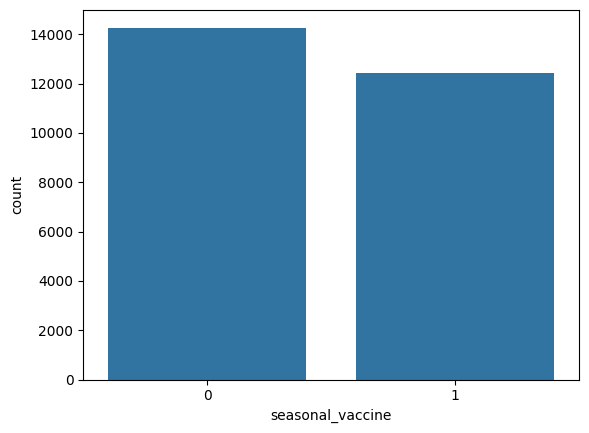

In [373]:
# checking the distribution of the target variable
sns.countplot(data=target, x="seasonal_vaccine")
plt.savefig("images/seasonal_vaccine_count_plot.png")

**Observations**

* Fewer respondents reported receiving the seasonal flu vaccine compared to those who did not.

In [374]:
frequency = target["seasonal_vaccine"].value_counts()
frequency

seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

**Class balance:**

The two classes have fairly similar counts, indicating that the dataset is reasonably balanced and does not suffer from significant class imbalance.

#### **Further Preparation for Analysis**

* To streamline the analysis, a new DataFrame named train_target is created by merging the train_filled and target DataFrames. This combined DataFrame consolidates all the necessary information for conducting both univariate and multivariate analysis, as well as for developing machine learning models.

In [375]:
#Merge the two datasets
train_target = train_filled.merge(target, on="respondent_id")

* Next, the respondent_id column is set as the index of the DataFrame.

In [376]:
#make respondent id the index column
train_target.set_index("respondent_id", inplace=True)
train_target

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,not employed,not employed,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,Married,Own,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,not employed,not employed,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,not employed,not employed,0
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Unknown,Unknown,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,not employed,not employed,1


## Univariate Analysis

**EDA Socioeconomic Features**

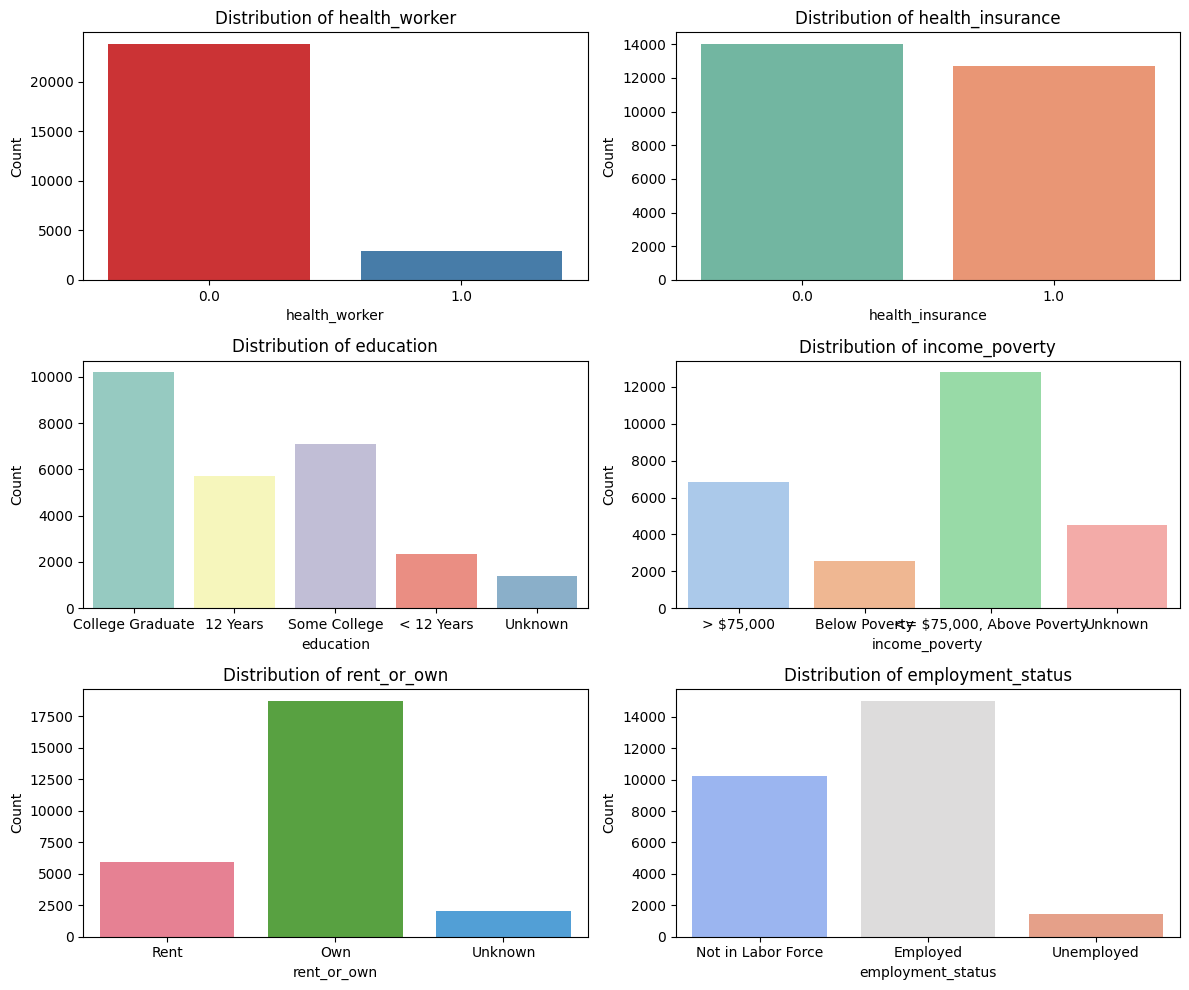

In [377]:
#List of columns to create countplots for

columns_to_plot = ["health_worker", "health_insurance", "education",
                   "income_poverty", "rent_or_own", "employment_status"]

# Calculate the number of rows and columns for subplots dynamically
num_plots = len(columns_to_plot)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Define a list of color palettes (can be custom or built-in Seaborn palettes)
palettes = ['Set1', 'Set2', 'Set3', 'pastel', 'husl', 'coolwarm']

# Loop through the columns and create individual countplots
for i, column in enumerate(columns_to_plot):
    if i >= num_rows * num_cols:
        fig.delaxes(axes[i])
    else:
        if column == "age_group":
            sns.countplot(data=train_target, x=column,
                          order=train_target["age_group"].value_counts().index,
                          ax=axes[i], palette=palettes[i % len(palettes)])
        else:
            sns.countplot(data=train_target, x=column, hue=column, palette=palettes[i], ax=axes[i], legend=False)
        
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Count")
        axes[i].set_title(f"Distribution of {column}")


 # Adjust the layout and spacing between subplots
plt.tight_layout()

# Save the image
plt.savefig("images/socio_econ.png")

# Show the subplots
plt.show()       

**Observations**

* The majority of respondents were employed in professions outside the healthcare sector.

* The number of individuals with health insurance was close to those without it, though the uninsured slightly outnumbered the insured. This difference may be influenced by the earlier decision to treat missing values as uninsured.

* The education distribution resembled a normal curve, with most participants having attained a college-level education.

* A large portion of respondents reported a household income below $75,000. Additionally, many chose not to reveal their income and were labeled as "Unknown."

* Most participants reported owning the homes they live in.

* A significant number of respondents were employed at the time the data was collected.

**Exploratory Data Analysis of Behavioral Attributes**

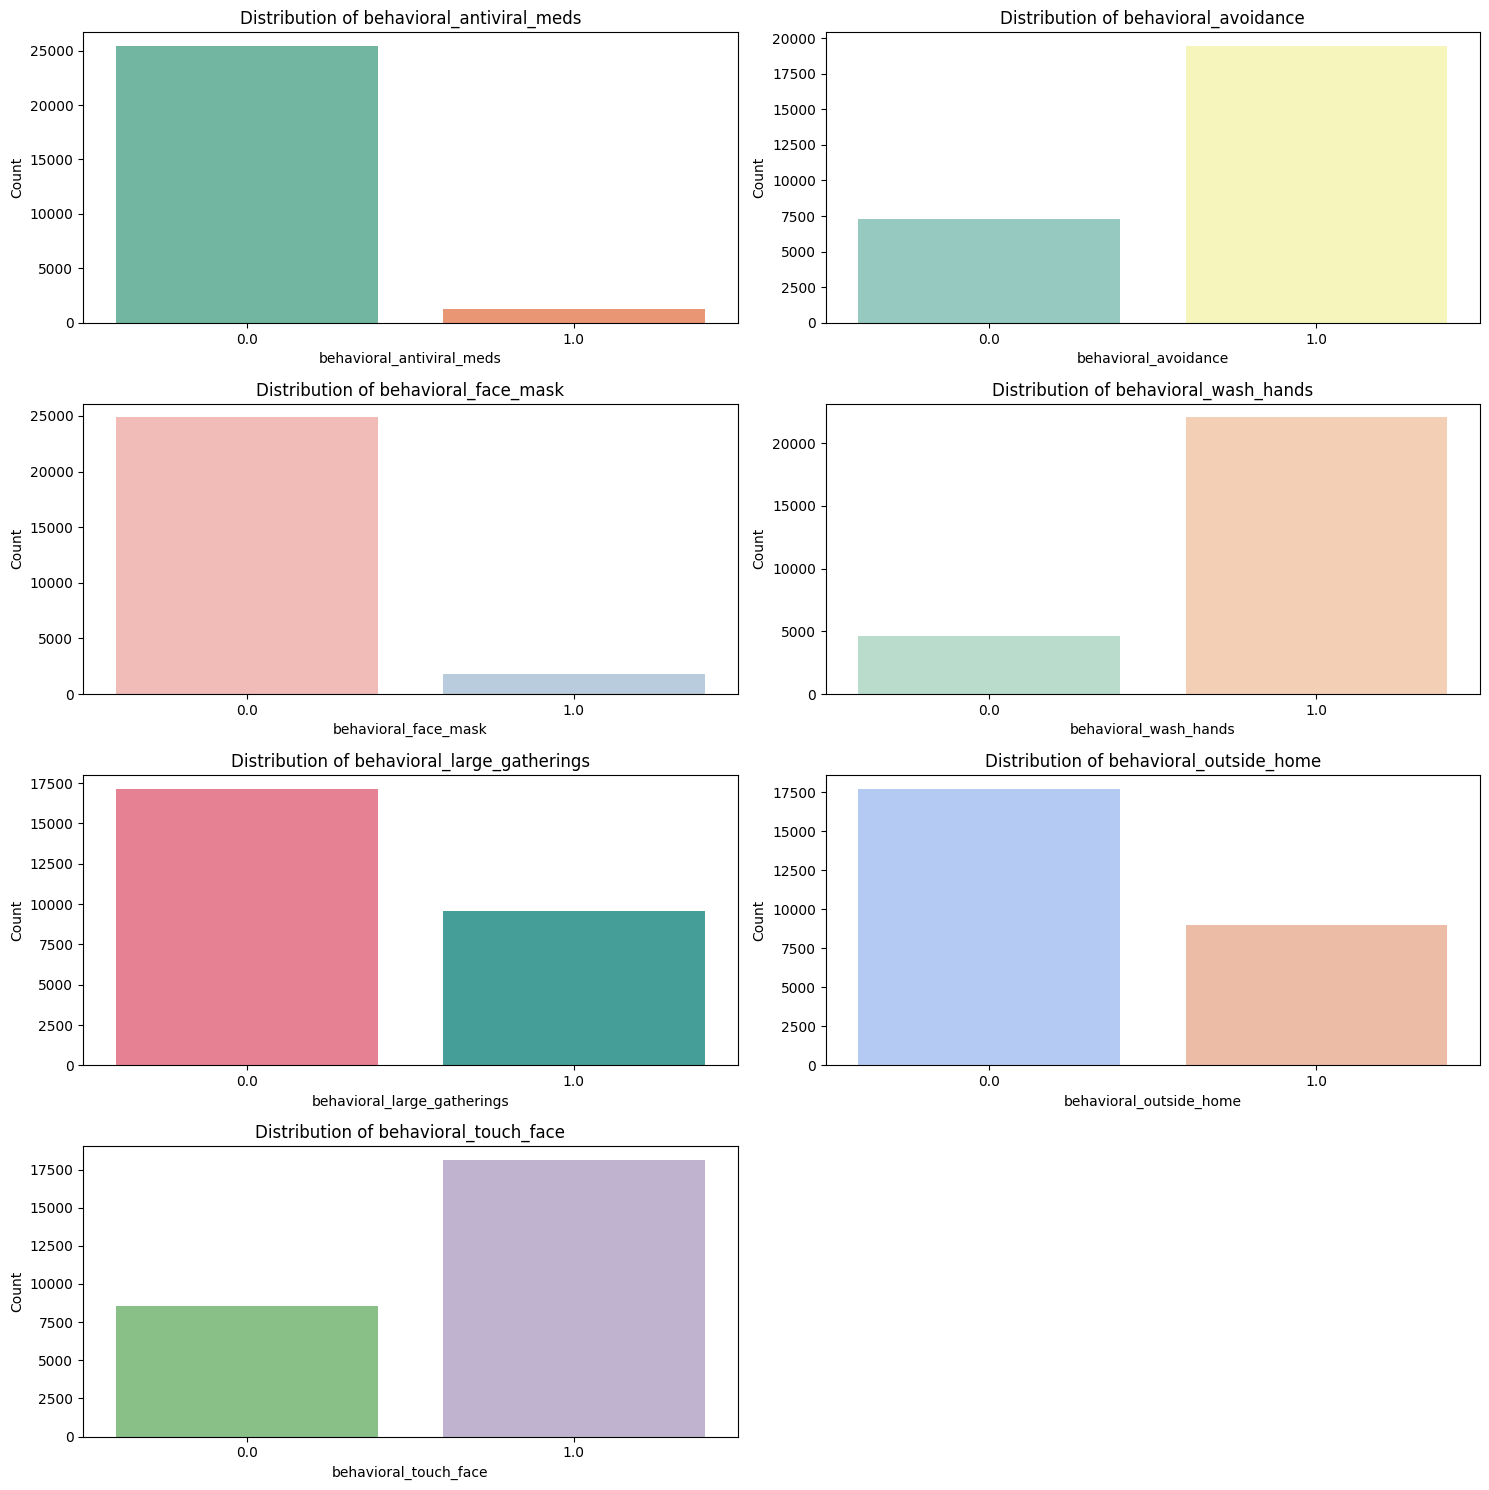

In [378]:
# List of behavioral columns to plot
columns_to_plot = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", 
                   "behavioral_wash_hands", "behavioral_large_gatherings", 
                   "behavioral_outside_home", "behavioral_touch_face"]

# Color palettes to cycle through
palettes = ['Set2', 'Set3', 'Pastel1', 'Pastel2', 'husl', 'coolwarm', 'Accent']

# Define subplot layout
num_rows = 4
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

# Loop through and plot each feature with a different color palette
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=train_target, x=column, hue=column, palette=palettes[i % len(palettes)], ax=axes[i], legend=False)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution of {column}")

# Remove the extra subplot if it exists
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()

# Save image
plt.savefig("images/behavior_colored.png")

# Display plots
plt.show()


**Observations**
* Most respondents reported not taking antiviral medications. However, this response may be influenced by how the question was framed, suggesting a need for further clarification.

* A large portion of participants practiced avoidance of close contact with individuals showing flu-like symptoms.

* Hand hygiene was widely adopted, with most respondents regularly washing their hands or using hand sanitizer.

* The majority did not purchase or use face masks.

* Many participants also indicated they refrained from touching their face, nose, or mouth.

* There was little evidence of social distancing behavior among the respondents.

**Exploratory Data Analysis of Demographic Features**

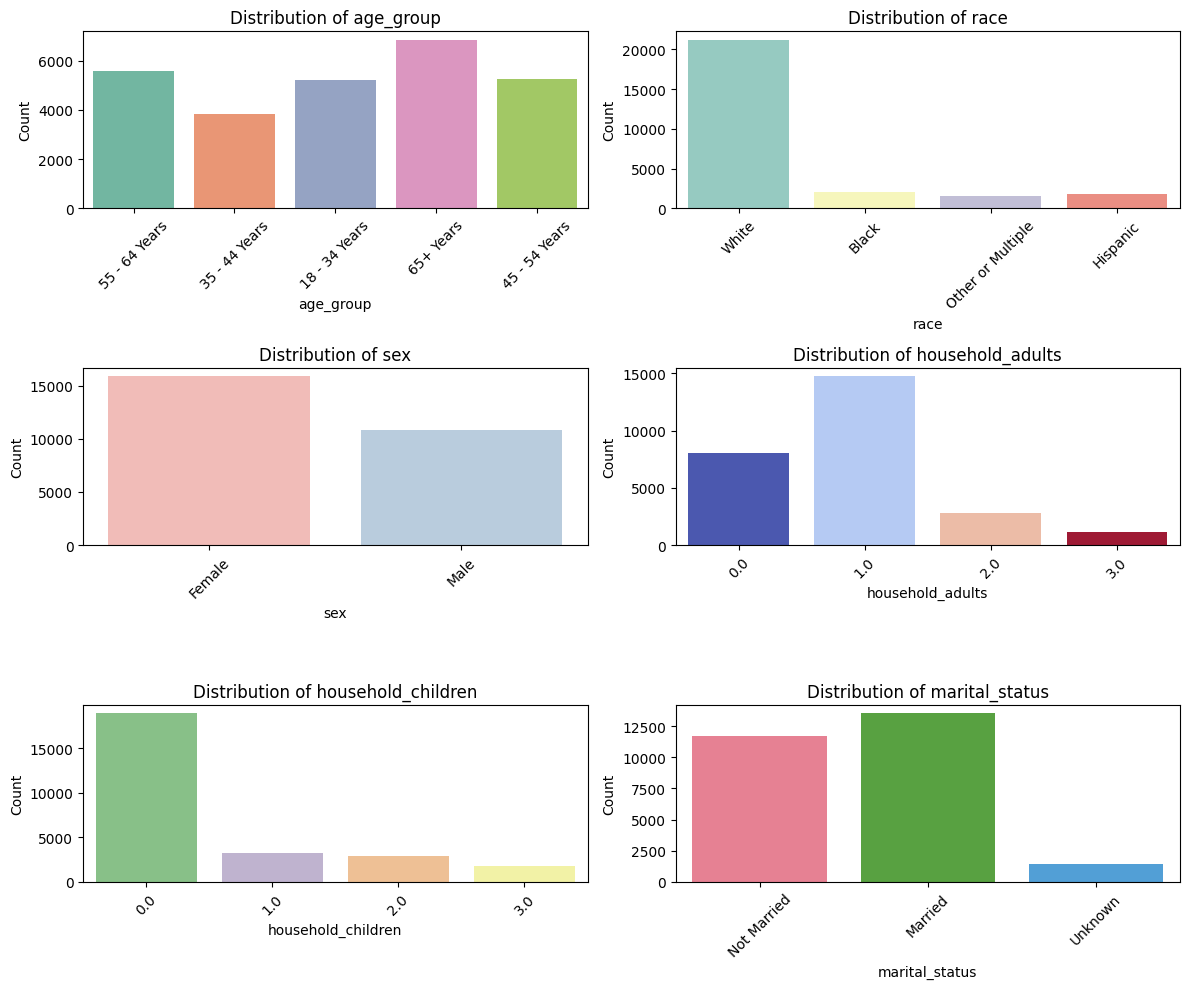

In [379]:
# List of demographic columns to create countplots for
demographic_columns = ["age_group", "race", "sex", "household_adults", "household_children", "marital_status"]

# Define custom palettes or use built-in Seaborn palettes
palettes = ['Set2', 'Set3', 'Pastel1', 'coolwarm', 'Accent', 'husl']

# Calculate subplot layout
num_plots = len(demographic_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

# Loop to generate each countplot with a different palette
for i, column in enumerate(demographic_columns):
    if i >= num_rows * num_cols:
        fig.delaxes(axes[i])
    else:
        sns.countplot(data=train_target, x=column, hue=column,
                      palette=palettes[i % len(palettes)], ax=axes[i], legend=False)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Count")
        axes[i].set_title(f"Distribution of {column}")
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability

# Adjust layout
plt.tight_layout()

# Save the image
plt.savefig("images/demographic_colored.png")

# Show the plots
plt.show()

**Observations**

* The age distribution of respondents followed a roughly normal pattern, with the largest group being individuals aged 65 and above—a trend often seen in developed nations.

* Most participants identified as female and white.

* A significant portion of households had at least two adults and no children at the time of the survey.

* The proportion of married and unmarried respondents was nearly equal.

* The majority resided outside areas classified as Metropolitan Statistical Areas (MSAs) by the U.S. Census Bureau.

**Exploratory Data Analysis of Vaccine Knowledge, Attitudes, and Beliefs**

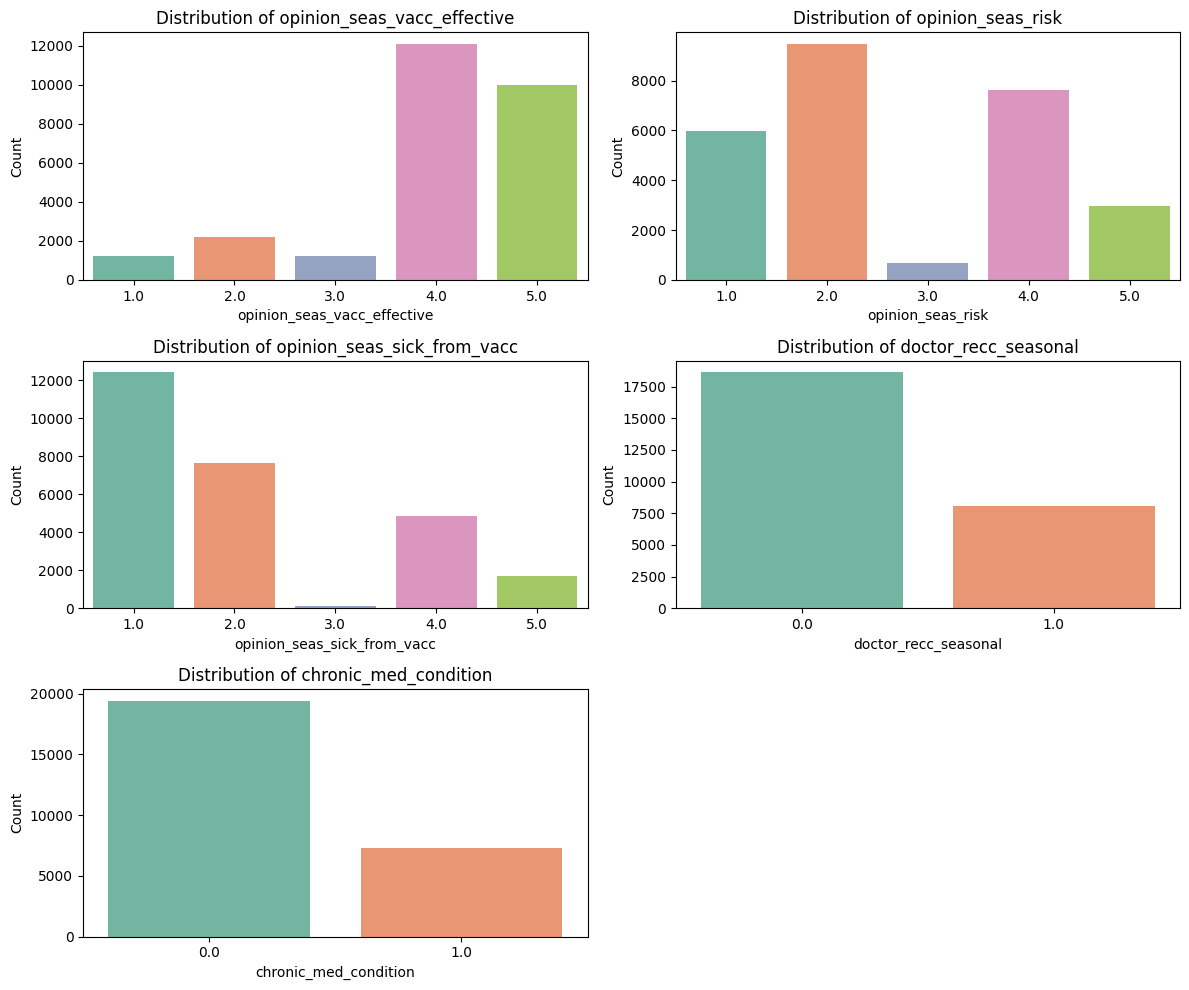

In [380]:
# List of columns to create countplots for
columns_to_plot = ["opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc",
                   "doctor_recc_seasonal", "chronic_med_condition"]

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create individual countplots
for i, column in enumerate(columns_to_plot):
    # Determine number of unique values for proper palette length
    num_categories = train_target[column].nunique()
    palette = sns.color_palette("Set2", n_colors=num_categories)

    sns.countplot(data=train_target, x=column, ax=axes[i], hue=column, palette=palette, legend=False)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution of {column}")

# Remove the unused subplot
fig.delaxes(axes[-1])

plt.tight_layout()

# Save the figure
plt.savefig("images/opinions.png")

# Show the subplots
plt.show()

**Observations**

* Most participants believed that seasonal vaccines are effective and were not concerned about experiencing illness as a result of getting vaccinated.

* Despite this, a significant portion of respondents perceived a low risk of contracting the flu without vaccination.

* A majority reported not receiving any recommendation from a healthcare provider to get vaccinated.

* The majority of individuals surveyed did not report having any chronic medical conditions.

### Bivariate Analysis

**Socieconomic Features vs Seasonal Vaccine Uptake**



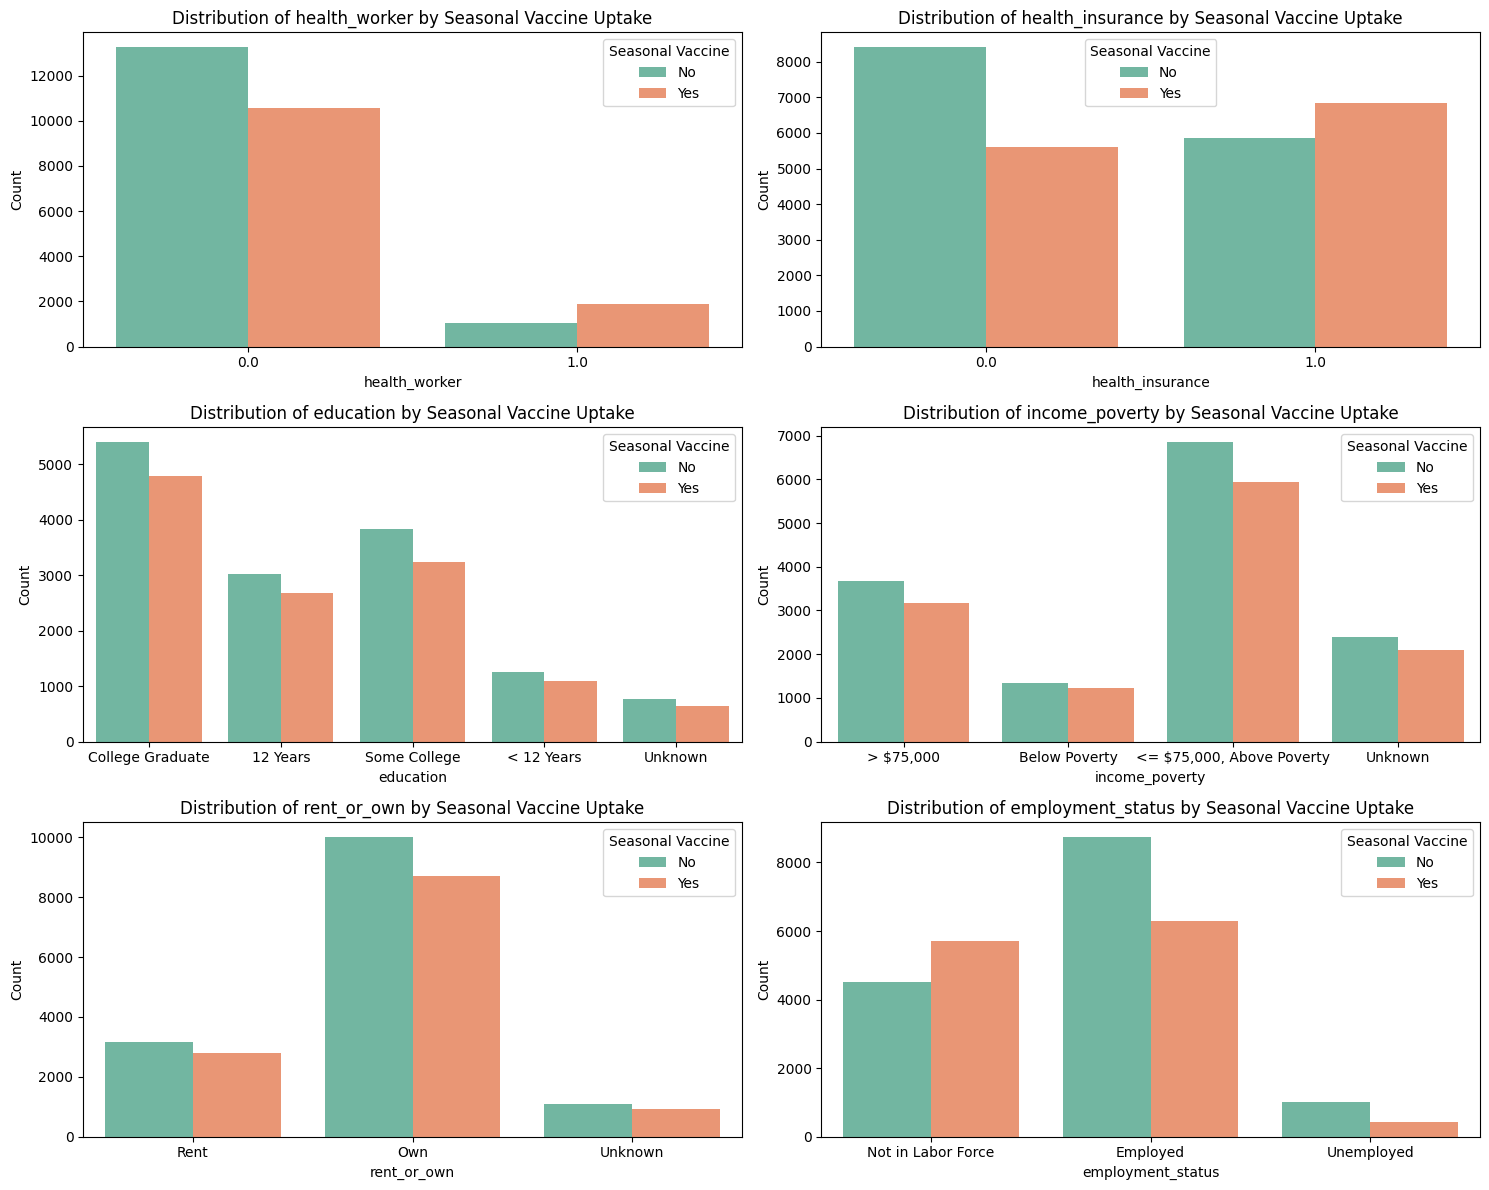

In [381]:
# columns to plot
y = ["health_worker", "health_insurance", "education",
     "income_poverty", "rent_or_own", "employment_status"]

# Define a two-color palette for binary hue
vaccine_palette = sns.color_palette("Set2", n_colors=2)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

for i, variable in enumerate(y):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=train_target, ax=ax, palette=vaccine_palette)
    ax.set_title(f"Distribution of {variable} by Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

plt.tight_layout()

# Save image
plt.savefig("images/socio-econ_binary.png")

# Show the subplots
plt.show()

**Observations**

* Health workers were more likely to receive the vaccine compared to non-health workers, who largely remained unvaccinated.

* Individuals with health insurance showed higher vaccination rates than those without coverage.

* Those with a college education were more inclined to get vaccinated.

* Respondents from lower-income households were less likely to receive the vaccine.

* People who owned their homes had higher vaccination uptake than those renting or with unspecified housing status.

* Employment status also influenced uptake, with employed individuals more frequently choosing to get vaccinated than their unemployed counterparts.



**Behavioral Features vs Seasonal Vaccine Uptake**

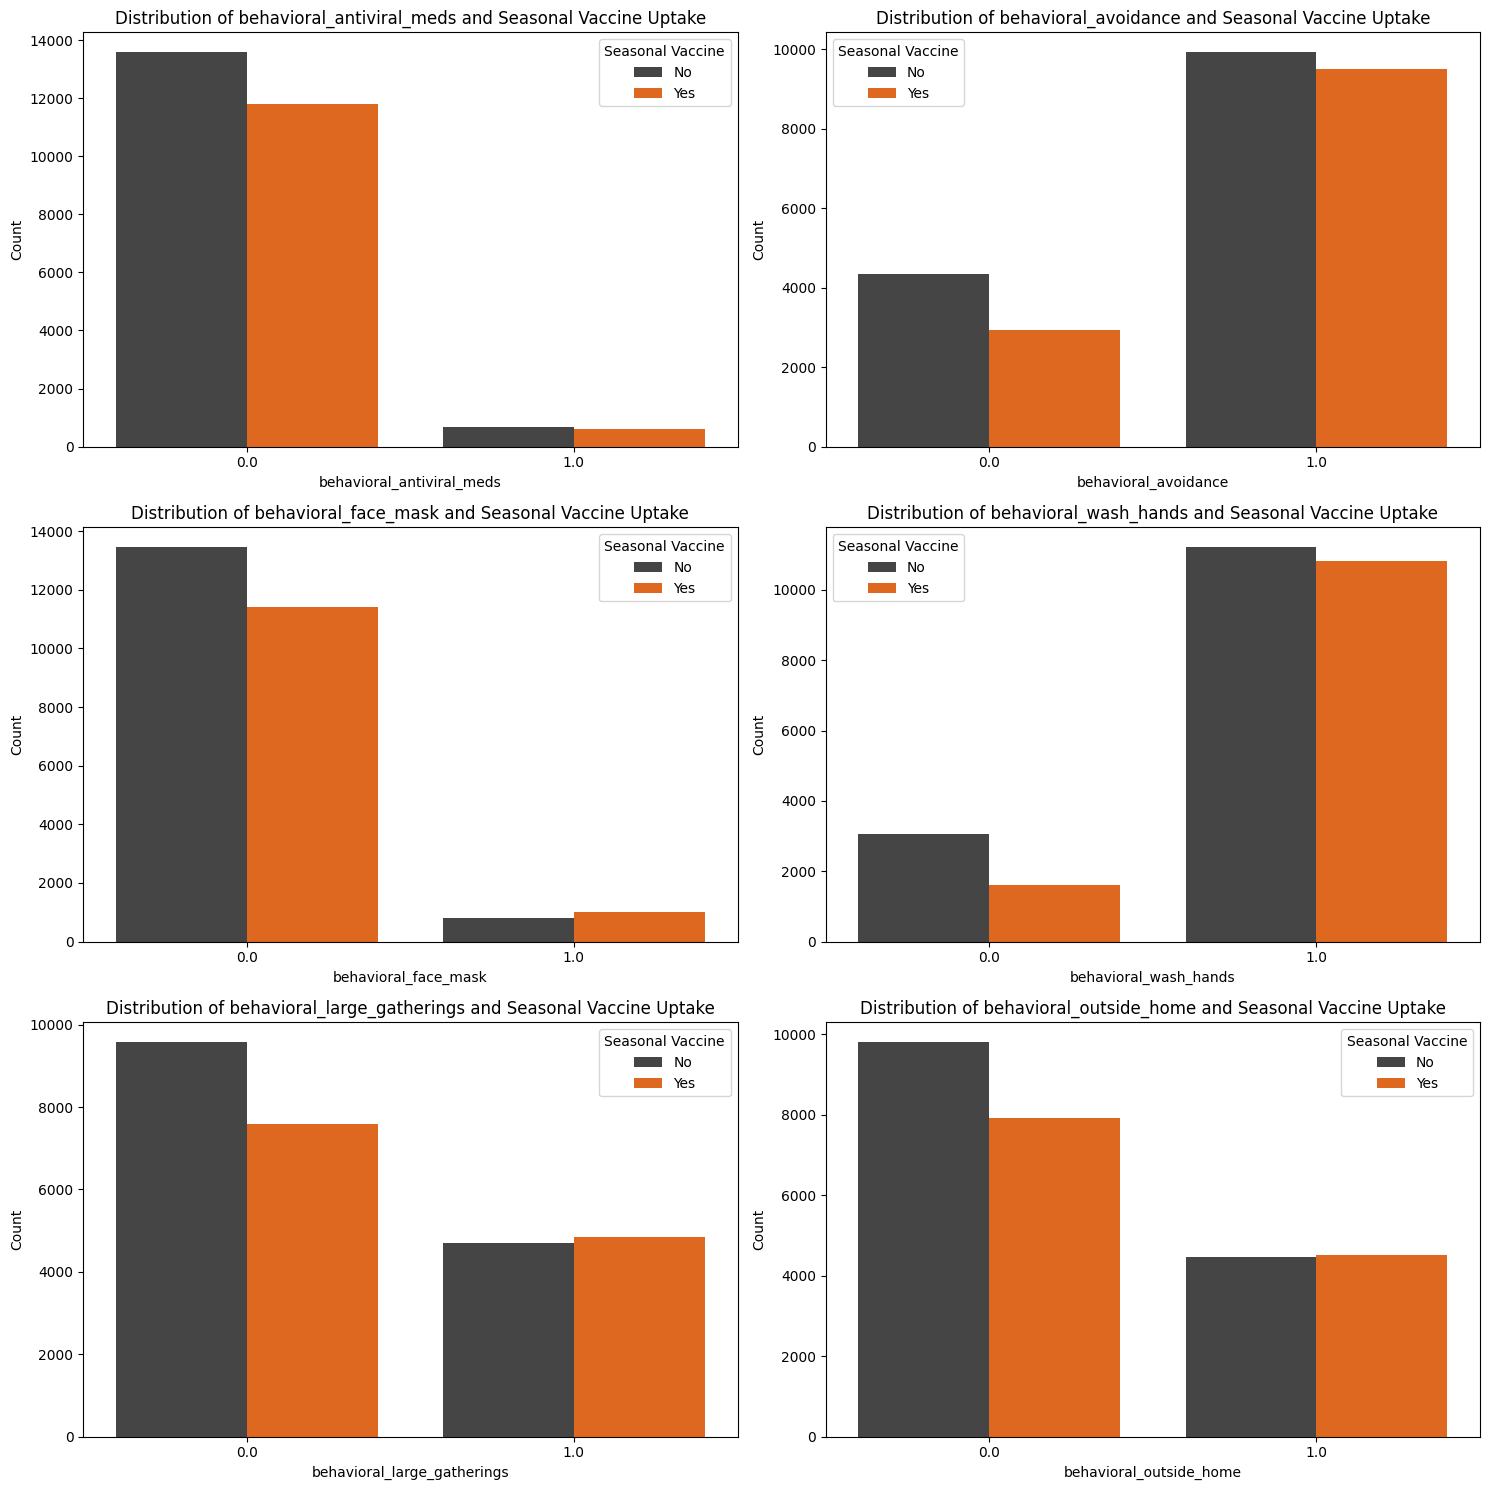

In [382]:
# columns to plot
y = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask",
     "behavioral_wash_hands", "behavioral_large_gatherings", "behavioral_outside_home"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Define custom color palette
custom_palette = ["#454545", "#FF6000"]

for i, variable in enumerate(y):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=train_target, ax=ax, palette=custom_palette)
    ax.set_title(f"Distribution of {variable} and Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

plt.tight_layout()
plt.savefig("images/behavioral_binary.png")
plt.show()

**Observations**


1. Behavioral: Antiviral Meds (behavioral_antiviral_meds)

* The majority of both vaccinated and unvaccinated respondents did not take antiviral meds.

* Note :Slightly more people who took antiviral meds also took the seasonal vaccine, suggesting a small positive association.

2. Behavioral: Avoidance (behavioral_avoidance)

* A large number of both vaccinated and unvaccinated individuals reported avoidance behavior.

* Note: Slightly higher count of avoidance among vaccinated individuals, indicating a possible positive link.

3. Behavioral: Face Mask (behavioral_face_mask)

* Most respondents did not use face masks, but among those who did, the vaccinated group is slightly more prevalent.

* Note: Vaccinated individuals are more likely to report face mask usage.

4. Behavioral: Wash Hands (behavioral_wash_hands)

* Hand-washing is very common across both groups, with a slightly higher proportion in the vaccinated group.

* Note: Indicates good hygiene behavior is generally prevalent but slightly more so among the vaccinated.

5. Behavioral: Large Gatherings (behavioral_large_gatherings)

* Both vaccinated and unvaccinated individuals show similar avoidance of large gatherings.

* No significant difference, implying this behavior may not strongly correlate with vaccination status.

6. Behavioral: Outside Home (behavioral_outside_home)

* Slightly more vaccinated individuals avoided going outside compared to unvaccinated.

* Note: Mild positive association between staying at home and being vaccinated.

General Insight:
* Most behaviors (like avoidance, mask-wearing, hand-washing) show a slight positive association with seasonal vaccine uptake.

* However, behaviors such as avoiding large gatherings and staying home are more evenly distributed, suggesting weaker association.

* In general, behavioral factors had little effect on whether respondents decided to get vaccinated. Regardless of whether individuals were on antiviral medication, avoided contact with people displaying flu symptoms outside the home, or frequently washed their hands and used sanitizers, the overall outcome was that fewer people had received the vaccine.

### Demographic features vs Seasonal Uptake

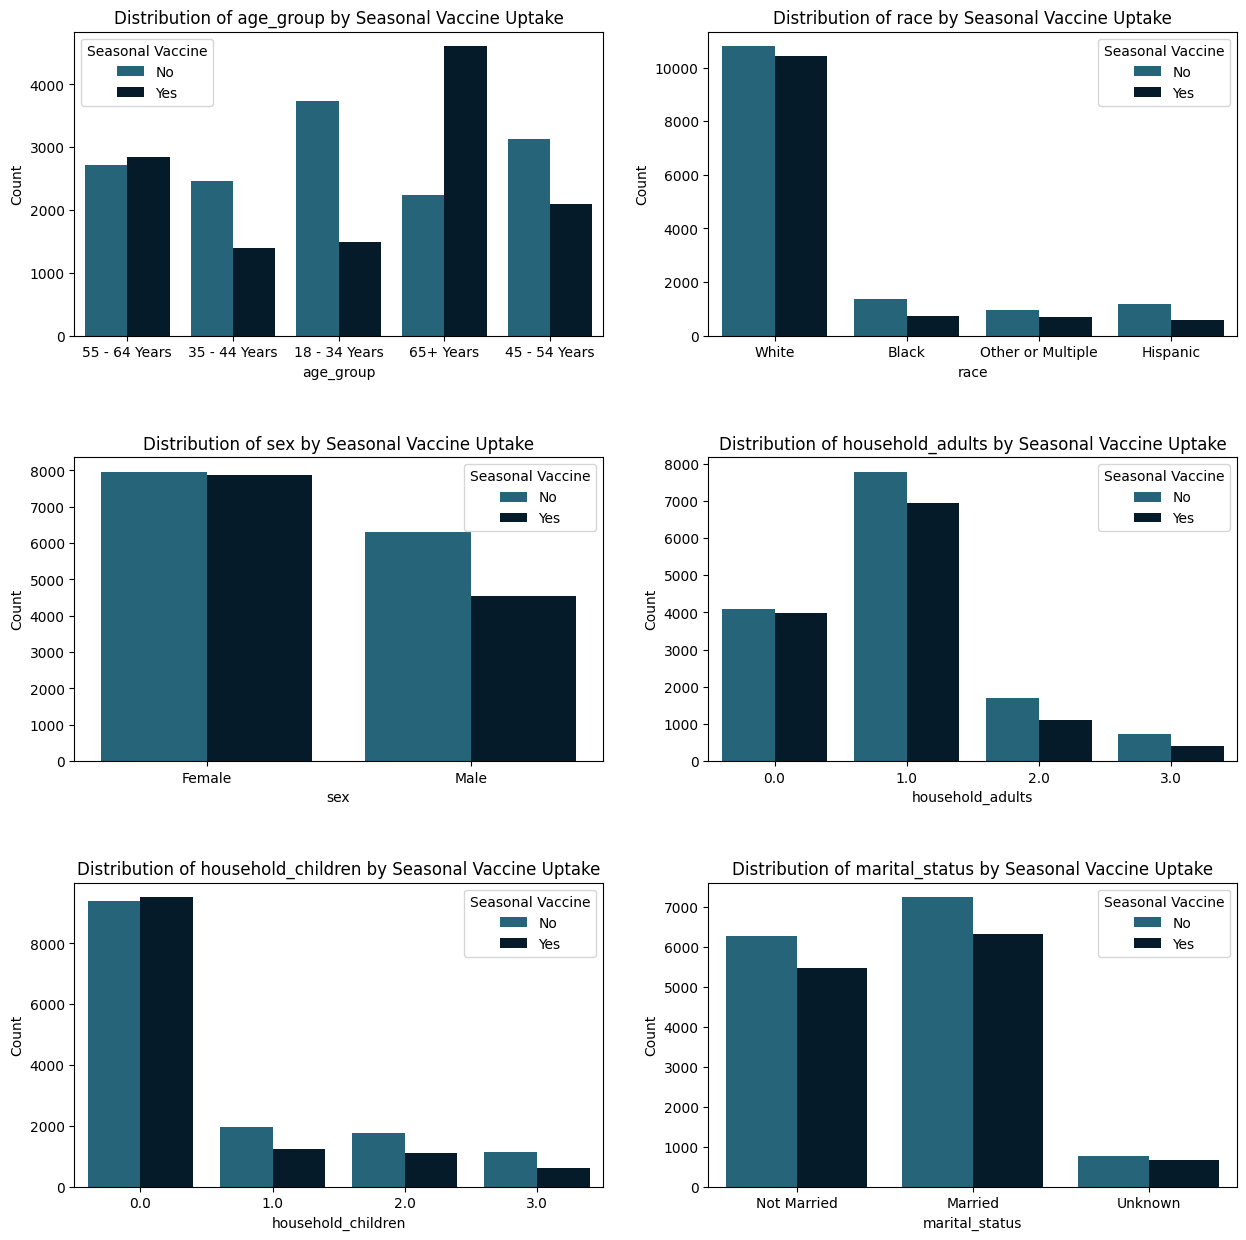

In [383]:
# columns to plot
y = ["age_group", "race", "sex", "household_adults", "household_children", "marital_status"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
custom_palette = ["#176B87", "#001C30"]
for i, variable in enumerate(y):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=train_target, ax=ax,palette=custom_palette)
    ax.set_title(f"Distribution of {variable} by Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

plt.savefig("images/demographic_binary.png")
plt.show()

**Observations**
* Age Group: Vaccine uptake is highest among the 65+ age group and lowest among the 18–34 age group.

* Race: White individuals dominate the sample and have relatively balanced vaccine uptake compared to other racial groups.

* Sex: Females and males have similar vaccination rates, with a slightly higher uptake among females.

* Household Adults: Individuals living in two-adult households are more likely to be vaccinated than those in other arrangements.

* Household Children: People without children show higher vaccine uptake than those with children.

* Marital Status: Married individuals are more likely to be vaccinated than those not married or with unknown status.

### Knowledge, Attitudes and Beliefs Towards Vaccines vs Seasonal Vaccine Uptake

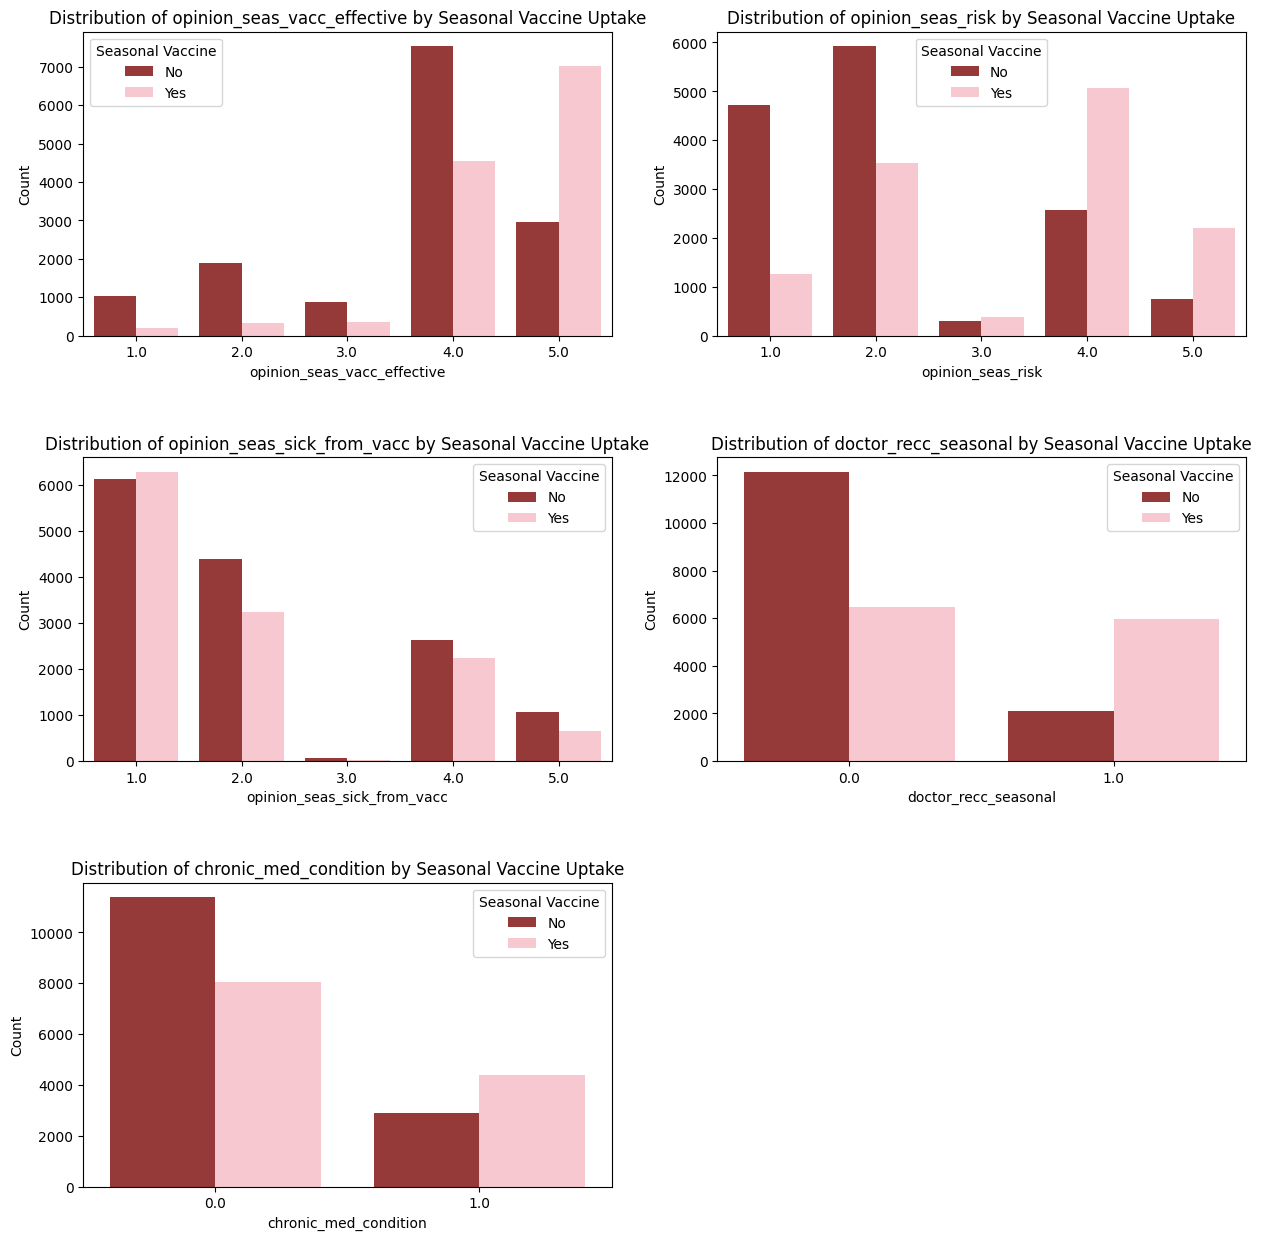

In [384]:
# columns to plot
y = ["opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc",
     "doctor_recc_seasonal", "chronic_med_condition"]

num_plots = len(y)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
custom_palette = ["brown", "pink"]

for i, variable in enumerate(y):
    if i >= num_plots:
        break

    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=train_target, ax=ax, palette=custom_palette)
    ax.set_title(f"Distribution of {variable} by Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Remove any extra blank subplot
if num_plots < num_cols * num_rows:
    fig.delaxes(axes.flatten()[num_plots])

plt.savefig("images/opinion_binary.png")
plt.show()

**Observations**

**Opinion: Vaccine Effectiveness**
* Individuals who believe the seasonal vaccine is effective (rating 4 or 5) are much more likely to be vaccinated.

**Opinion: Risk of Seasonal Flu**
* Higher perceived risk of seasonal flu correlates with higher vaccine uptake.

**Opinion: Getting Sick from Vaccine**
* Those who strongly disagree with the idea that the vaccine makes them sick (rating 1) are more likely to be vaccinated.

**Doctor Recommendation (doctor_recc_seasonal)**
* A strong positive association exists—those who received a doctor’s recommendation are significantly more likely to be vaccinated.

**Chronic Medical Condition**
* Individuals with chronic medical conditions show higher vaccine uptake compared to those without.

## **Feature Engineering**

### **Data Encoding**

First, the data types are displayed once again to determine the affected features.

In [385]:
# Display the train infor
train_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26707 non-null  float64
 1   behavioral_avoidance         26707 non-null  float64
 2   behavioral_face_mask         26707 non-null  float64
 3   behavioral_wash_hands        26707 non-null  float64
 4   behavioral_large_gatherings  26707 non-null  float64
 5   behavioral_outside_home      26707 non-null  float64
 6   behavioral_touch_face        26707 non-null  float64
 7   doctor_recc_seasonal         26707 non-null  float64
 8   chronic_med_condition        26707 non-null  float64
 9   child_under_6_months         26707 non-null  float64
 10  health_worker                26707 non-null  float64
 11  health_insurance             26707 non-null  float64
 12  opinion_seas_vacc_effective  26707 non-null  float64
 13  opinion_seas_risk    

The train dataset has no missing values

**One-Hot Encoding**

**Columns** - "age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status", "census_msa", and "income_poverty."

In [386]:
from sklearn.preprocessing import OneHotEncoder
encoded_df = train_target[["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status",
                           "census_msa", "income_poverty"]]
#using one-encoding to create dummy column
ohe = OneHotEncoder()
data_enc1= ohe.fit_transform(encoded_df)

#converting the finding into dataframe
data_enc1.todense()

#getting feature names
ohe.get_feature_names_out()

# geting feature names in a dataframe
data_encoded = pd.DataFrame(data_enc1.todense(), columns=ohe.get_feature_names_out())
data_encoded.head()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,...,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


* A copy of the DataFrame was created to preserve the original dataset while performing data manipulations.

In [387]:
train_target_copy = train_target.copy()
train_target_copy.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,not employed,not employed,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,Married,Own,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,not employed,not employed,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [388]:
columns_to_drop = ["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status",
                   "census_msa", "income_poverty", "hhs_geo_region", "employment_industry", "employment_occupation"]
train_target_copy.drop(columns_to_drop, axis=1, inplace=True)
train_target_copy.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,0.0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,1.0,0.0,0.0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,1.0,0.0,0


* The merged train_target_float DataFrame combines numerical columns from train_target_copy with the one-hot encoded binary columns from data_encoded, resulting in a dataset where all features are represented numerically.

In [389]:
train_target_float = pd.merge(train_target_copy, data_encoded, left_index=True, right_index=True)
train_target_float.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   behavioral_antiviral_meds                 26707 non-null  float64
 1   behavioral_avoidance                      26707 non-null  float64
 2   behavioral_face_mask                      26707 non-null  float64
 3   behavioral_wash_hands                     26707 non-null  float64
 4   behavioral_large_gatherings               26707 non-null  float64
 5   behavioral_outside_home                   26707 non-null  float64
 6   behavioral_touch_face                     26707 non-null  float64
 7   doctor_recc_seasonal                      26707 non-null  float64
 8   chronic_med_condition                     26707 non-null  float64
 9   child_under_6_months                      26707 non-null  float64
 10  health_worker                          

Now that the combined dataframe is numeric lets do a  multivariate analysis using a correlation heatmap

### **Multivariate Analysis using Correlation**

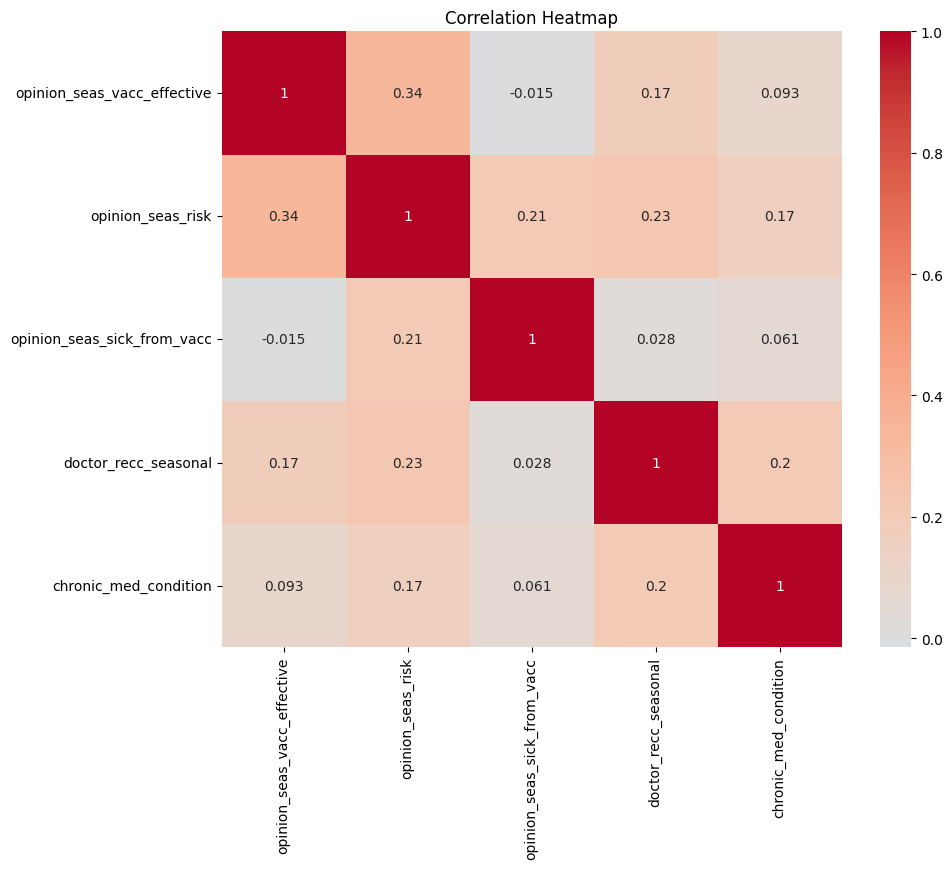

In [390]:
# Set the data for corr
corr = train_target_float.corr()['seasonal_vaccine'].sort_values(ascending = False)
corr = corr[(corr > 0.1)] # correlation greater than 0.1
columns = corr.index.tolist()

# df with only the selected columns
corr_df = train_target_float[columns_to_plot]

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.savefig("images/corr_map.png")


**Observations**

* The strongest correlation (0.34) exists between opinions about vaccine effectiveness and perceptions of seasonal disease risk, suggesting people who view vaccines as effective tend to also perceive the seasonal illness as risky.

* Interestingly, there's a slight negative correlation (-0.015) between believing vaccines are effective and concerns about getting sick from the vaccine itself, indicating these perspectives are somewhat opposed.

* Doctor recommendations for seasonal vaccines show modest positive correlations with both perceived vaccine effectiveness (0.17) and perceived disease risk (0.23), but minimal correlation with concerns about vaccine side effects (0.028).

* Having a chronic medical condition shows weak positive correlations with all other factors, with the strongest being with doctor recommendations (0.2), suggesting those with chronic conditions may be slightly more attentive to medical advice.

* The correlation between believing one could get sick from the vaccine and perceived seasonal disease risk is positive (0.21), indicating some people simultaneously fear both the disease and potential vaccine side effects.

* Overall, most correlations in this dataset are relatively weak (under 0.3), with only the relationship between vaccine effectiveness opinions and disease risk perceptions showing moderate strength.

### **Modelling**

#### **Baseline model**

**Baseline Metrics**

Before conducting any modeling on the data, a "dummy" model that always predicts the positive class is first used.

* "negative" is defined as a 0 (not received vaccine ) and "positive" as a 1 (received the vaccine).

* Focus is on the test data, since this is will be used to evaluate the actual model as well.

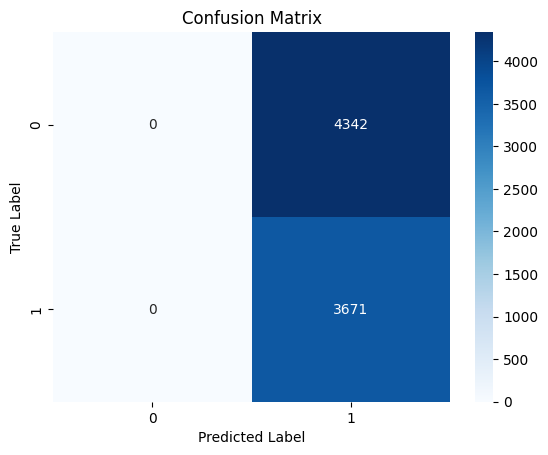

In [391]:
# split data into train and test, claze size=0.3
X = train_target_float.drop(columns=["seasonal_vaccine"], axis=1)
y = train_target_float["seasonal_vaccine"]

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the dummy classifier
dummy_classifier = DummyClassifier(strategy="constant", constant=1)
dummy_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dummy_classifier.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.savefig("images/baseline_cm.png")
plt.show()

In [392]:
# Evaluation of the baseline model

#Accuracy=TP+TN/TP+TN+FP+FN
TP=3671
TN=0
FP=4342
FN=0
baseline_accuracy=(TP+TN)/(TP+FP+TN+FN)
print("Baseline Accuracy: " ,baseline_accuracy)

#precision TP/TP+FP
baseline_precision=(TP/(TP+FP))
print("Baseline Precision: " ,baseline_precision)

baseline_recall=(TP/(TP+FN))
print("Baseline Recall: " ,baseline_recall)

baseline_F1score=(2*baseline_precision* baseline_recall)/(baseline_precision+baseline_recall)
print("Baseline F1score: " ,baseline_F1score)

Baseline Accuracy:  0.4581305378759516
Baseline Precision:  0.4581305378759516
Baseline Recall:  1.0
Baseline F1score:  0.6283806915439919


**Baseline Model Observations**

* The baseline accuracy is around 45.81%, indicating that the dummy classifier correctly predicts approximately 45.81% of the test instances.

* Baseline precision is also 45.81%, matching the accuracy because the classifier always predicts the positive class.

* Baseline recall is 100%, as the dummy model consistently predicts the positive class and thus captures all actual positive cases.

* The baseline F1-score is about 62.84%, reflecting the balance between precision and recall, though a higher score would indicate better performance.

These baseline metrics serve as a benchmark to evaluate and compare the performance of more advanced models.

### **1. Logistic Regression**

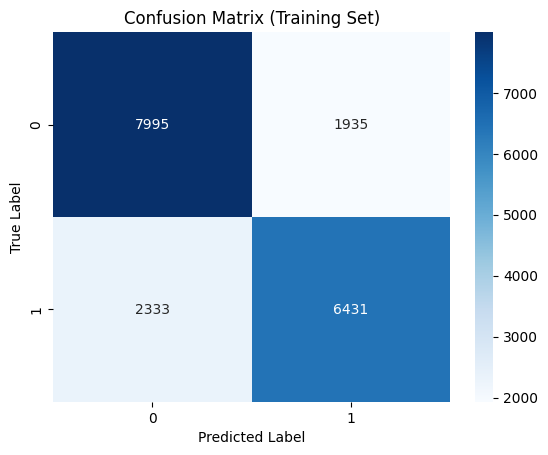

In [393]:
# fit the model in logistic regression

# Instantiate the model
model1 = LogisticRegression(random_state=42)

# Fit the model on the scaled data
model1.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred1 = model1.predict(X_train_scaled)

# Create confusion matrix
cm = confusion_matrix(y_train, y_train_pred1)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Set)")

plt.savefig("images/logistic_cm.png")

plt.show()

In [394]:
# cross validate the model using 3 kfolds
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model1, X_train_scaled, y_train, cv=3)
print("Cross-Validation Scores:", cv_scores)

average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", average_cv_score * 100) # in percentage

Cross-Validation Scores: [0.77086008 0.76889745 0.77515648]
Average Cross-Validation Score: 77.16380003168554


**Insights**

* The scores indicate that the model is approximately 77.28% accurate in its performance.

In [395]:
#evaluation of model
y_pred = model1.predict(X_test_scaled)
model1_accuracy = accuracy_score(y_test, y_pred)
model1_recall = recall_score(y_test, y_pred)
model1_precision = precision_score(y_test, y_pred)
model1_f1 = f1_score(y_test, y_pred)

print(f"""
Accuracy Fitted Model 1: {model1_accuracy:1.3f}
Recall Fitted Model 1: {model1_recall:1.3f}
Precision Fitted Model 1: {model1_precision:1.3f}
F1 Score Fitted Model 1: {model1_f1:1.3f}
""")


Accuracy Fitted Model 1: 0.776
Recall Fitted Model 1: 0.730
Precision Fitted Model 1: 0.769
F1 Score Fitted Model 1: 0.749



Train AUC Score 0.8477800502651375
Test AUC Score 0.8490229481735981


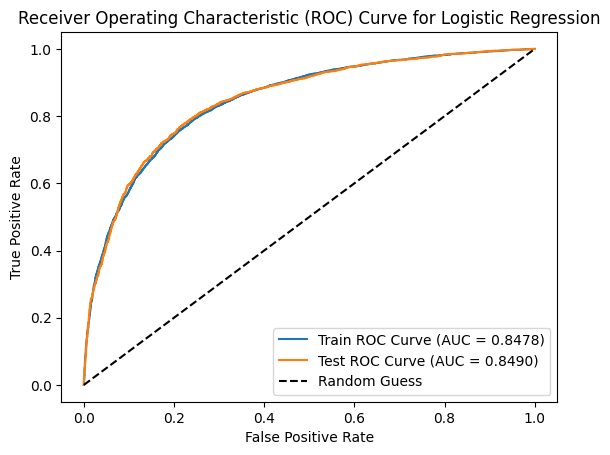

In [396]:
# calcluate ROC

# Obtain the predicted probabilities for the positive class
y_test_prob = model1.predict_proba(X_test_scaled)[:, 1]
y_train_prob = model1.predict_proba(X_train_scaled)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
train_fpr_l, train_tpr_l, thresholds = roc_curve(y_train, y_train_prob)
test_fpr_l, test_tpr_l, thresholds = roc_curve(y_test, y_test_prob)

# Calculate the AUC score
auc_score_model1_train = roc_auc_score(y_train, y_train_prob)
auc_score_model1_test = roc_auc_score(y_test, y_test_prob)

print("Train AUC Score", auc_score_model1_train)
print("Test AUC Score", auc_score_model1_test)

# Plot the ROC curve
plt.plot(train_fpr_l, train_tpr_l, label="Train ROC Curve (AUC = {:.4f})".format(auc_score_model1_train))
plt.plot(test_fpr_l, test_tpr_l, label="Test ROC Curve (AUC = {:.4f})".format(auc_score_model1_test))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Logistic Regression")
plt.legend(loc="lower right")

plt.savefig("images/logistic_roc_curve.png")

plt.show()

**Logistic Regression Model Observations**

**Train AUC Score: 0.85**

Indicates strong ability of the model to distinguish between the positive and negative classes on the training data.

**Test AUC Score: 0.85**

Similar to the training AUC, suggesting good generalization and minimal overfitting.

**Accuracy: 78.2%**

A notable improvement over the baseline (45.81%), showing the model correctly classifies most instances.

**Recall: 73.9%**

The model successfully captures a large portion of actual positive cases, reducing false negatives.

**Precision: 77.4%**

Demonstrates that a high proportion of positive predictions are correct.

**F1 Score: 75.6%**

Reflects a well-balanced trade-off between precision and recall.

The ROC curve above shows a AUC score of 0.8523 on the test set, revealing that the model is quite good on distinguishing between those who received the seasonal flu vaccine or not (positives and negatives).

The score is close to 1, meaning that the predictive power of the model can be trusted.

**Conclusion:** Logistic Regression significantly outperforms the baseline dummy classifier across all metrics, with consistent AUC scores and strong precision-recall balance, making it a reliable starting model.

### **Model 2 - Decision Trees**

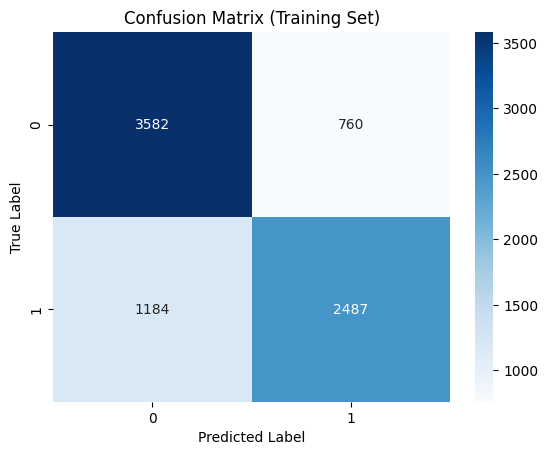

In [397]:
# Test set predictions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# instantiate
model2 = DecisionTreeClassifier(criterion="gini", max_depth=5)

# fit the model on train data
model2.fit(X_train_scaled, y_train)

y_pred2 = model2.predict(X_test_scaled)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred2)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Set)")

plt.savefig("images/decision_trees_cm.png")

In [398]:
#evaluation of model
y_pred = model2.predict(X_test_scaled)
model2_accuracy = accuracy_score(y_test, y_pred)
model2_recall = recall_score(y_test, y_pred)
model2_precision = precision_score(y_test, y_pred)
model2_f1 = f1_score(y_test, y_pred)

print(f"""
Accuracy Fitted Model: {model2_accuracy:1.3f}
Recall Fitted Model: {model2_recall:1.3f}
Precision Fitted Model: {model2_precision:1.3f}
F1 Score Fitted Model: {model2_f1:1.3f}
""")


Accuracy Fitted Model: 0.757
Recall Fitted Model: 0.677
Precision Fitted Model: 0.766
F1 Score Fitted Model: 0.719



Train AUC Score 0.8308916523377012
Test AUC Score 0.8259197193484707


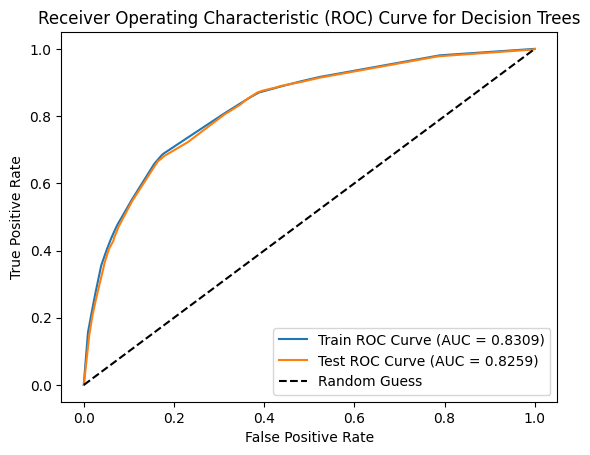

In [399]:
# ROC and AUC
# calcluate ROC

# Obtain the predicted probabilities for the positive class
y_test_pred = model2.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model2.predict_proba(X_train_scaled)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
training_fpr_d, training_tpr_d, _  = roc_curve(y_train, y_train_pred)
test_fpr_d, test_tpr_d, _  = roc_curve(y_test, y_test_pred)

# Calculate the AUC score
auc_score_model2_test = roc_auc_score(y_test, y_test_pred)
auc_score_model2_train = roc_auc_score(y_train, y_train_pred)

print("Train AUC Score", auc_score_model2_train)
print("Test AUC Score", auc_score_model2_test)

# Plot the ROC curve
plt.plot(training_fpr_d, training_tpr_d, label="Train ROC Curve (AUC = {:.4f})".format(auc_score_model2_train))
plt.plot(test_fpr_d, test_tpr_d, label="Test ROC Curve (AUC = {:.4f})".format(auc_score_model2_test))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Decision Trees")
plt.legend(loc="lower right")

plt.savefig("images/decision_trees_roc_curve.png")

plt.show()


**Decision Trees Observations**

* Fitted Model Performance Observations
Accuracy: 75.7% – The model performs well overall, correctly predicting most instances, and significantly better than the baseline.

* Recall: 67.7% – The model captures over two-thirds of actual positive cases, though there's room for improvement in sensitivity.

* Precision: 76.6% – Indicates that a high proportion of positive predictions are accurate.

* F1 Score: 71.9% – Suggests a solid balance between precision and recall, reflecting dependable performance.

**AUC and ROC Insights**

* Train AUC Score: 0.83 and Train ROC Curve AUC: 0.9040 – The model performs very well on training data, distinguishing between classes with high confidence.

* Test AUC Score: 0.83 and Test ROC Curve AUC: 0.8539 – Consistent with training results, confirming the model generalizes well without significant overfitting.

**Conclusion:** The model demonstrates strong generalization and a good balance between performance metrics, with high AUC values validating its effectiveness in distinguishing between classes on both training and test sets.

## **Model 3 - Random Forest**

In [400]:
# Perform feature engineering or transformation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# instantiate
model3 = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using grid search
param_grid = {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10]}
grid_search = GridSearchCV(model3, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model3 = grid_search.best_estimator_

# Fit the best model on the scaled data
best_model3.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

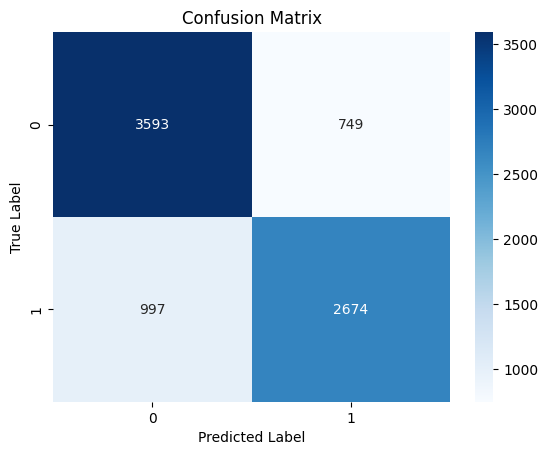

In [401]:
y_pred3 = best_model3.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.savefig("images/random_forest_cm.png")
plt.show()

In [402]:
#evaluation of model
y_pred = best_model3.predict(X_test_scaled)
model3_accuracy = accuracy_score(y_test, y_pred)
model3_recall = recall_score(y_test, y_pred)
model3_precision = precision_score(y_test, y_pred)
model3_f1 = f1_score(y_test, y_pred)

print(f"""
Accuracy Fitted Model: {model3_accuracy:1.3f}
Recall Fitted Model: {model3_recall:1.3f}
Precision Fitted Model: {model3_precision:1.3f}
F1 Score Fitted Model: {model3_f1:1.3f}
""")


Accuracy Fitted Model: 0.782
Recall Fitted Model: 0.728
Precision Fitted Model: 0.781
F1 Score Fitted Model: 0.754



Train AUC Score: 0.9016
Test AUC Score: 0.8513


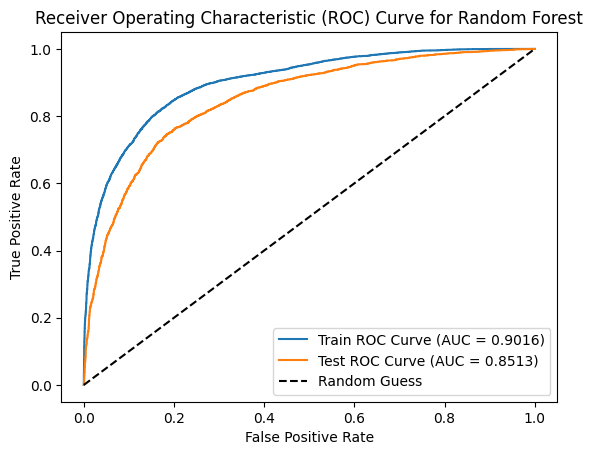

In [403]:
# Predict on training and test sets
training_preds3 = best_model3.predict_proba(X_train_scaled)[:, 1]
test_preds3 = best_model3.predict_proba(X_test_scaled)[:, 1]

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds for ROC curve
training_fpr_r, training_tpr_r, _ = roc_curve(y_train, training_preds3)
test_fpr_r, test_tpr_r, _ = roc_curve(y_test, test_preds3)

# Calculate the AUC score
training_auc_model3 = roc_auc_score(y_train, training_preds3)
test_auc_model3 = roc_auc_score(y_test, test_preds3)
print("Train AUC Score: {:.4f}". format(training_auc_model3))
print("Test AUC Score: {:.4f}".format(test_auc_model3))

# Plot the ROC curve
plt.plot(training_fpr_r, training_tpr_r, label="Train ROC Curve (AUC = {:.4f})".format(training_auc_model3))
plt.plot(test_fpr_r, test_tpr_r, label="Test ROC Curve (AUC = {:.4f})".format(test_auc_model3))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Random Forest")
plt.legend(loc="lower right")

plt.savefig("images/random_forest_roc_curve.png")

plt.show()

Randomn Forest Observations

* Accuracy: 78.2% – A strong overall performance, indicating the model is correctly classifying most cases.

* Recall: 72.8% – The model is effective in identifying a high proportion of actual positive cases.

* Precision: 78.1% – Most of the model's positive predictions are accurate, minimizing false positives.

* F1 Score: 75.4% – Reflects a well-balanced trade-off between precision and recall, indicating reliable predictive capability.

**AUC and ROC Insights**

* Train AUC Score / ROC AUC: 0.9016 – The model separates the classes very well on training data, showing excellent discriminative power.

* Test AUC Score / ROC AUC: 0.8513 – High AUC on test data confirms the model maintains strong performance and generalizes well.

**Conclusion:** This fitted model shows robust and balanced performance across all key metrics, with high AUC values reinforcing its reliability in distinguishing between classes on both training and unseen data.

### 4. **XGBoost Algorithm**

In [404]:
# import library
from xgboost import XGBClassifier

# Instantiate XGBClassifier
model4 = XGBClassifier()

# Fit XGBClassifier
model4.fit(X_train_scaled, y_train)

# Predict on training and test sets
training_preds = model4.predict_proba(X_train_scaled)[:, 1]
test_preds = model4.predict_proba(X_test_scaled)[:, 1]
# Predict on training and test sets
training_preds = model4.predict(X_train_scaled)
test_preds = model4.predict(X_test_scaled)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy: {:.4}".format(training_accuracy))
print("Validation accuracy: {:.4}".format(test_accuracy))
print()

# evaluation
# Calculating precision, recall, and F1-score for the validation set
model4_precision = precision_score(y_test, test_preds)
model4_recall = recall_score(y_test, test_preds)
model4_f1 = f1_score(y_test, test_preds)

print("Precision: {:.4f}".format(model4_precision))
print("Recall: {:.4f}".format(model4_recall))
print("F1-Score: {:.4f}".format(model4_f1))

Training Accuracy: 0.8738
Validation accuracy: 0.7658

Precision: 0.7486
Recall: 0.7358
F1-Score: 0.7421


Train AUC Score: 0.8728
Test AUC Score: 0.7634


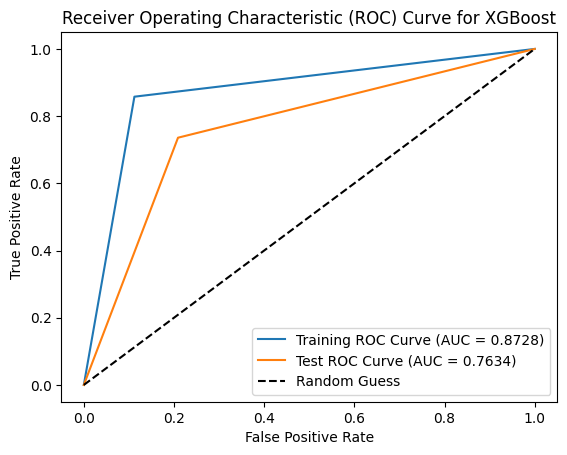

In [405]:
# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds for ROC curve
training_fpr_x, training_tpr_x, _ = roc_curve(y_train, training_preds)
test_fpr_x, test_tpr_x, _ = roc_curve(y_test, test_preds)

# Calculate AUC scores for training and test sets
training_auc_model4 = roc_auc_score(y_train, training_preds)
test_auc_model4 = roc_auc_score(y_test, test_preds)

# Print AUC Score
print("Train AUC Score: {:.4f}". format(training_auc_model4))
print("Test AUC Score: {:.4f}".format(test_auc_model4))

# Plot the ROC curve
plt.plot(training_fpr_x, training_tpr_x, label="Training ROC Curve (AUC = {:.4f})".format(training_auc_model4))
plt.plot(test_fpr_x, test_tpr_x, label="Test ROC Curve (AUC = {:.4f})".format(test_auc_model4))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for XGBoost")
plt.legend(loc="lower right")

plt.savefig("images/xgboost_roc_curve.png")
plt.show()

**Model Performance Observations**

This model has performed better than Logistic Regression and Decision Trees. It is highly likely that the algorithm has lived up to its performance characteristics of capturing complex patterns in data to provide high and improved accuracy. The results are as follows:

* Training Accuracy: 87.38% – Indicates strong performance on training data, suggesting the model has learned the patterns well.

* Validation Accuracy: 76.58% – Still strong, but lower than training accuracy, which may hint at some overfitting.

**Classification Metrics**

* Precision: 74.86% – A high proportion of positive predictions are correct.

* Recall: 73.58% – The model captures most of the actual positive cases.

* F1-Score: 74.21% – Reflects a solid balance between precision and recall.

**AUC and ROC Insights**

* Train AUC Score / ROC AUC: 0.8728 – The model separates the classes very well on the training set.

* Test AUC Score / ROC AUC: 0.7634 – Lower than the training AUC, suggesting a drop in class separation ability on unseen data.

Analysis of the ROC curve reveals that the model was the least powerful in prediciting the test data. An AUC of 0.7674 on the test data, while still high, is the least among the four models.

**Conclusion:** The model performs strongly on training data and reasonably well on validation data, though the performance gap and drop in AUC indicate slight overfitting; still, it maintains a good balance between precision and recall.









## **Model Evaluation Summary**

In [406]:
# create the summary df and define columns
scores = pd.DataFrame(np.array([
        ['Logistic Regression', 78.2, 73.9, 77.4, 85.0, 85.2],
        ['Decision Tree', 75.8, 67.5, 76.9, 83.1, 82.6],
        ['Random Forest', 78.4, 72.9, 78.3, 90.4, 85.4],
        ['XGBoost', 77.0, 74.0, 75.3, 87.5, 76.7]
]))
scores.columns = ["Model", "Accuracy", "Recall", "Precision", "Training AUC Score", "Test AUC Score"]
scores

,Model,Accuracy,Recall,Precision,Training AUC Score,Test AUC Score
0,Logistic Regression,78.2,73.9,77.4,85.0,85.2
1,Decision Tree,75.8,67.5,76.9,83.1,82.6
2,Random Forest,78.4,72.9,78.3,90.4,85.4
3,XGBoost,77.0,74.0,75.3,87.5,76.7


**Key Observations**

* Best Accuracy: Random Forest (78.4%) edges out Logistic Regression and others.

* Best Recall: XGBoost (74.0%), closely followed by Logistic Regression (73.9%).

* Best Precision: Random Forest (78.3%), showing very reliable positive predictions.

* Highest Train AUC: Random Forest (90.4%), indicating strong learning on training data.

* Highest Test AUC: Random Forest (85.4%), also suggesting the best generalization among the models.

**Conclusion:** While Logistic Regression and XGBoost perform well, Random Forest offers the most balanced and consistently high performance across all metrics.It has demonstrated a commendable performance in predicting the uptake of the seasonal flu vaccine with strong evaluation metrics and an ROC curve with strong discriminatory power.









### **Final ROC Curve (all combined for test data)**

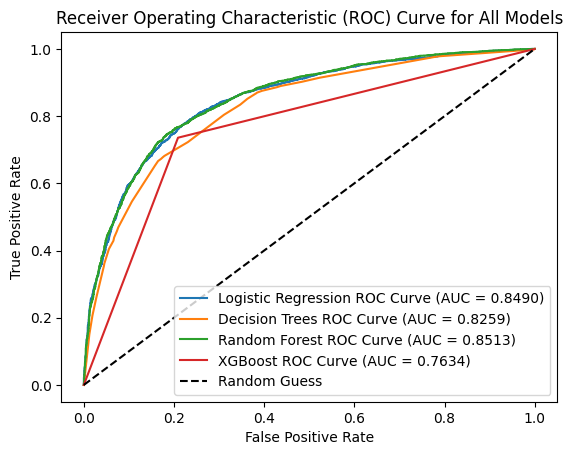

In [407]:
plt.plot(test_fpr_l, test_tpr_l, label="Logistic Regression ROC Curve (AUC = {:.4f})".format(auc_score_model1_test))
plt.plot(test_fpr_d, test_tpr_d, label="Decision Trees ROC Curve (AUC = {:.4f})".format(auc_score_model2_test))
plt.plot(test_fpr_r, test_tpr_r, label="Random Forest ROC Curve (AUC = {:.4f})".format(test_auc_model3))
plt.plot(test_fpr_x, test_tpr_x, label="XGBoost ROC Curve (AUC = {:.4f})".format(test_auc_model4))

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for All Models")
plt.legend(loc="lower right")

plt.savefig("images/all_roc_curve.png")
plt.show()

### **Feature Importance Analysis**

* This step will help to further understand the most important features when predicting seasonal flu vaccine uptake.

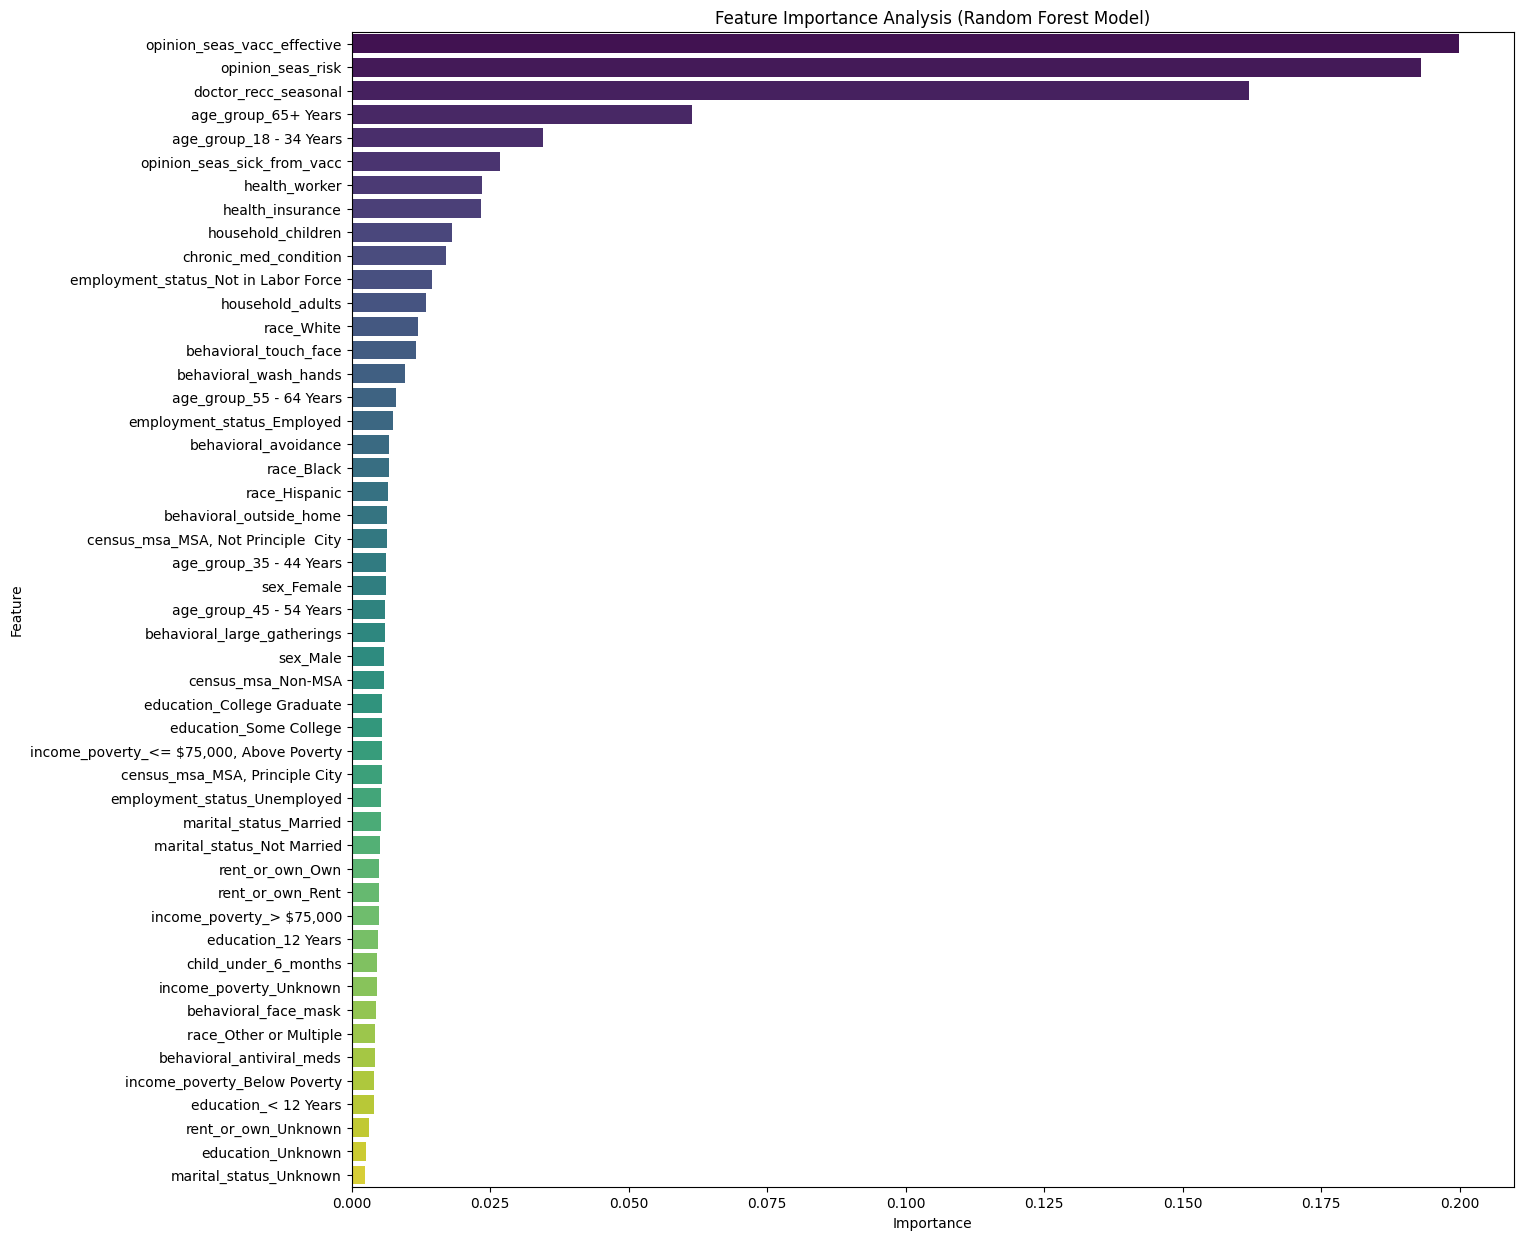

In [408]:
# Get feature importances from the Random Forest model (Model 3)
importance_scores = best_model3.feature_importances_

# DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importance_scores})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plotting feature importance
plt.figure(figsize=(15, 15))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis", hue="Feature", dodge=False, legend=False)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis (Random Forest Model)")
plt.savefig("images/random_forest_feature_importance.png")
plt.show()

In [409]:
# Set a threshold for feature importance
threshold = 0.05

# Select the features with importance scores above the threshold
selected_features = feature_importance_df.loc[feature_importance_df["Importance"] > threshold, "Feature"]
selected_features

12    opinion_seas_vacc_effective
13              opinion_seas_risk
7            doctor_recc_seasonal
21            age_group_65+ Years
Name: Feature, dtype: object

In [410]:
# Set a threshold for feature importance
threshold = 0.05

# Select the features with importance scores above the threshold
selected_features = feature_importance_df.loc[feature_importance_df["Importance"] > threshold, "Feature"]
selected_features

12    opinion_seas_vacc_effective
13              opinion_seas_risk
7            doctor_recc_seasonal
21            age_group_65+ Years
Name: Feature, dtype: object

**Feature Importance Observations**

The most influential factors driving seasonal flu vaccine uptake are as follows:

1. **opinion_seas_vacc_effective**
This was the most impactful feature, indicating that individuals who believe in the effectiveness of the seasonal vaccine are more likely to get vaccinated.


2. **opinion_seas_risk**
The perception of being at risk of contracting seasonal flu without vaccination was the second most important predictor of vaccine uptake.


3. **doctor_recc_seasonal**
A doctor's recommendation played a major role in influencing individuals to receive the seasonal flu vaccine, making it the third key feature.


4. **age_group_65+ Years**
Age emerged as a strong demographic indicator, with individuals aged 65 and above showing a higher likelihood of vaccine uptake—likely driven by greater health concerns.


These top features collectively represent the strongest predictors of an individual's likelihood to receive the seasonal flu vaccine among all variables considered.

## Conclusion

### The Data

Extensive data exploration and preprocessing were necessary, especially to address missing values in key variables and mitigate biases, such as the race feature being skewed toward white participants.

### The Models

Model performances were relatively close across experiments, with performance metrics varying slightly by iteration. The Random Forest model achieved the best results, recording a test AUC of 0.8539.
Hyperparameter tuning was particularly time-intensive, and better class balance may lead to improved outcomes.

**Key Insights**

* Healthcare providers significantly influence vaccination decisions, highlighted by the importance of doctor recommendations.

* Public perception of vaccine safety and effectiveness plays a crucial role in vaccine uptake.

* Older adults were more likely to receive the flu vaccine, indicating age as an influential factor.

## Recommendations

* **Personalized Outreach:** Tailor communication efforts to address individual concerns and shape positive perceptions of vaccines.

* **Target Younger Populations:** Public health campaigns should focus more on engaging younger age groups, who appear less inclined to vaccinate.

* **Encourage Provider Involvement:** Continue empowering healthcare professionals to recommend vaccinations, as their input strongly influences behavior.

**Future Directions**

* Apply advanced feature engineering techniques to uncover deeper insights.

* Incorporate more recent datasets to reflect changing attitudes and behaviors post-COVID-19 for more relevant predictions.

